In [1035]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [1036]:
dataset= pd.read_csv("clientes_autos (2).csv")
dataset.head()

C:\Users\EGHORB~1\AppData\Local\Temp/ipykernel_17604/1934689414.py:1: DtypeWarning: Columns (66,67,68,69,72,73,74,75,78,79,80,81,84,85,86,87,90,91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset= pd.read_csv("clientes_autos (2).csv")


id01  id02  id03   id04       id05  \
0  de1926b3e5b14d5c8c578e6735119507ee895a75     2    20   6396  FRANCISCO   
1  2627335523261acbc278af615f564f47e10eea9b     2    20   8355       JOSE   
2  a9d21a6280487837f1927d7b1fe406f000ef73a3     2    20  11021    VICENTE   
3  996e497498d7cf527ec242a38c1b557db7813dac     2    20  13378     MOISES   
4  0103f37fda15f3e91063558b0ea72e3a8563b2f6     2    20  13648    PASCUAL   

         id06        id07        id08        id09  \
0  12/05/1977  12/05/2022  12/05/2023  12/05/2023   
1  25/05/1968  25/05/2018  25/05/2019  25/05/2018   
2  26/09/1977  26/09/2022  26/09/2023  26/09/2023   
3  07/10/1970  07/10/2022  07/10/2023         NaN   
4  23/11/1970  23/11/2022  23/11/2023         NaN   

                                                id10 id11 id13           id14  \
0                                  CAMBIO DE TOMADOR    B    A  MANTENIMIENTO   
1                                    RECIBO IMPAGADO    B    E       PROYECTA   
2  CIERRE DEL NEGOCIO / DESAPARICIÓN DEL RIESGO /...    B    C         OPTIMA   
3                                                NaN    B    A         OPTIMA   
4                                                NaN    B    C         OPTIMA   

               id15  id16  id17  id18        id19        id20    id21    id24  \
0  AGTES.EXCLUSIVOS  47.0    39   223  23/09/1947  15/02/1980  3801.0  Urbano   
1  AGTES.EXCLUSIVOS  51.0    34   201  23/03/1955  23/03/1980  3630.0     NaN   
2      OFIC.ENTIDAD  47.0    39   800  22/12/1962  02/03/1981  3804.0  Urbano   
3        CORREDORES  54.0    30   174  16/07/1922  15/07/1970  3804.0  Urbano   
4  AGTES.EXCLUSIVOS  54.0    33     1  23/03/1955  23/03/1980  3670.0     NaN   

   id25  id26  id27  id28  id29  id30  id31  id32  id33  id34  id35  id36  \
0   1.0     7     0     2     0     4     0     8     0    64    21  0.14   
1   1.0     2     0     1     1     0     0     0     0    67     0  0.00   
2   1.0     2     0     1     0     0     0     1     0    56     0  0.02   
3   1.0     3     1     2     0     6     0     1     0    63    28  0.08   
4   2.0     3     2     2     0     3     0     1     0    57    16  0.05   

   id37  id38  id39  id40      id41     id42     id43     id44    id45  id46  \
0  0.13  0.19  0.00     0  10764.77   858.47  4629.51   183.97   11.98   0.0   
1  0.00  0.00  0.00     0   1672.20   188.01     0.00     0.00    0.00   0.0   
2  0.02  0.00  0.02     0   4353.25   263.69   231.88   235.07    0.00   0.0   
3  0.02  0.21  0.00     0   9420.33  1638.80   552.59  1024.33  145.25   0.0   
4  0.02  0.19  0.00     0   5919.98   971.21   299.24  1171.94  220.79   0.0   

     id47    id48  id49    id50   id51  id52  id53               id54  id55  \
0  111.02    7.22   0.0   38.35   2.49   0.0     0  ANUAL DOMICILIADO -50.0   
1    0.00    0.00   0.0   57.95   7.24   0.0     0     ANUAL EFECTIVO -50.0   
2  141.48    0.00   0.0   48.48   0.00   0.0     0  ANUAL DOMICILIADO -50.0   
3  572.90   81.81   0.0  180.63  26.06   0.0     0  ANUAL DOMICILIADO -50.0   
4  708.26  133.43   0.0   67.48   8.43   0.0     0  ANUAL DOMICILIADO -50.0   

   id57  id58_1  id58_2  id58_3      id59     id60     id61 id66 id67  id70  \
0     2     NaN     1.0     NaN  23486.58  1395.65  4278.83   ND   ND  25.0   
1     3     NaN     NaN     NaN      0.00     0.00     0.00   ND   ND  60.0   
2     3     NaN     NaN     NaN      0.00     0.00     0.00   ND   ND  13.0   
3     0     NaN     1.0     NaN      0.00     0.00     0.00   ND   ND  25.0   
4     1     NaN     NaN     NaN      0.00     0.00     0.00   ND   ND  60.0   

   id71 id72  id73  id78_01_1 id78_01_2 id78_01_3 id78_01_4 id78_01_5  \
0   2.0    G   0.0        NaN       NaN       NaN       NaN       NaN   
1   2.0    D   0.0        NaN       NaN       NaN       NaN       NaN   
2   0.0    D   0.0        NaN       NaN       NaN       NaN       NaN   
3   4.0    G   0.0        NaN       NaN       NaN       NaN       NaN   
4   2.0    D   0.0      

In [1037]:
dataset.shape

(212971, 233)

In [1038]:
# Calcular la cantidad de NaN por variable
nan_counts = dataset.isna().sum()

# Calcular el porcentaje de NaN por variable
nan_percentages = (nan_counts / len(dataset)) * 100

# Crear un DataFrame para mostrar los resultados
nan_summary = pd.DataFrame({'NaN Count': nan_counts, 'NaN Percentage': nan_percentages})
nan_summary = nan_summary.sort_values(by='NaN Percentage', ascending=False)

# Configurar pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Mostrar el resumen de valores nulos con porcentajes
print(nan_summary)

                             NaN Count  NaN Percentage
AnyoConstruccion                212971      100.000000
Metros                          212971      100.000000
NPS                             212971      100.000000
Piscinas                        212971      100.000000
Banyos                          212971      100.000000
Habitaciones                    212971      100.000000
TipoConstruccion                212971      100.000000
Calidad                         212971      100.000000
Precio                          212971      100.000000
id78_05_5                       212392       99.728132
id78_05_4                       212367       99.716393
id78_05_3                       212367       99.716393
id78_05_2                       212367       99.716393
id78_05_1                       212367       99.716393
id78_05_6                       212367       99.716393
id78_04_5                       211510       99.313991
id78_04_4                       211410       99.267036
id78_04_3 

In [1039]:
# Remove variables with NaN
deletelist= ['AnyoConstruccion','Metros','NPS','Piscinas','Banyos','Habitaciones','TipoConstruccion','Calidad','Precio'
            ,'id03', 'id10', 'id66', 'id67', 'id07', 'id78_01_1', 'id78_01_2', 'id78_01_3', 'id78_01_4', 'id78_01_5',
             'id78_01_6', 'id78_02_1','id78_02_2', 'id78_02_3', 'id78_02_4', 'id78_02_5', 'id78_02_6', 'id78_03_1',
             'id78_03_2', 'id78_03_3', 'id78_03_4', 'id78_03_5','id78_03_6', 'id78_04_1', 'id78_04_2', 'id78_04_3',
             'id78_04_4', 'id78_04_5', 'id78_04_6', 'id78_05_1', 'id78_05_2', 'id78_05_3', 'id78_05_4',
             'id78_05_5', 'id78_05_6', 'id73', 'SINCOAnyos', 'SINCOSiniestrosMateriales', 'SINCOSiniestrosPersonales'
              , 'FechaAnulacionReal', 'ActasVariacionPrima', 'AnyoMatricula', 'ValorVehiculoMercado', 'CiaAnteriorID']
dataset= dataset.drop(deletelist, axis= 1)

id01

In [1040]:
dataset['id01'].nunique()

125300

In [1041]:
dataset.dropna(subset=['id01'], inplace=True)

In [1042]:
dataset['id01'].nunique()

125300

In each row of the dataset we don't have a unique client. I should find the variable with the unique values in each row.

id02

In [1043]:
dataset['id02'].nunique()

4

In [1044]:
# Obtener la frecuencia de cada categoría en la columna 'id02'
categorias_id02 = dataset['id02'].value_counts()

# Mostrar las categorías y sus frecuencias
print("Categories in 'id02' and their frequency:")
print(categorias_id02)

Categories in 'id02' and their frequency:
id02
2    181523
0     24426
1      7001
3         6
Name: count, dtype: int64


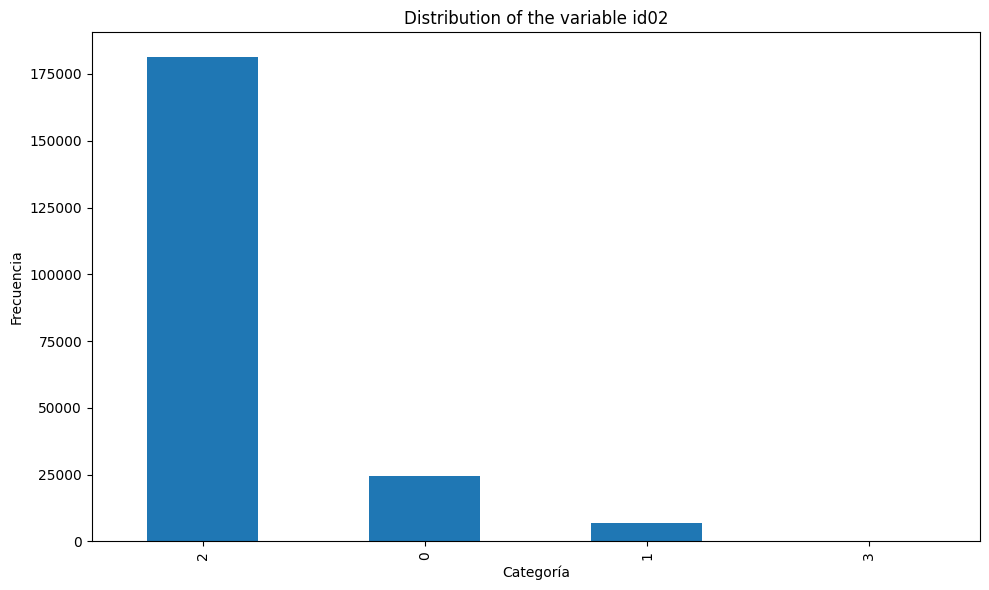

In [1045]:
# Obtener la frecuencia de cada categoría en 'id02'
categorias_id02 = dataset['id02'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
categorias_id02.plot(kind='bar')
plt.title('Distribution of the variable id02')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)

# Muestra el gráfico
plt.tight_layout()
plt.show()

the category 3 doesn't have meaning. I should decise what to do with this values later.

In [1046]:
# Filter the DataFrame for a specific client_id, for example 'A'
dataset = dataset[dataset['id02'] == 2]

In [1047]:
dataset.shape

(181523, 180)

Flota

In [1048]:
# Remove rows where flota has non-NaN values
dataset = dataset[dataset['Flota'].isna()]

In [1049]:
dataset = dataset[dataset['Subramo'] == 'TURISMO, MONOVOLUMEN, TODOTERRENO, CUADRICICLOS']

In [1050]:
dataset['Subramo'].unique()

array(['TURISMO, MONOVOLUMEN, TODOTERRENO, CUADRICICLOS'], dtype=object)

In [1051]:
dataset.shape

(134067, 180)

id03

In [1052]:
#dataset['id03'].nunique()

It has just one value, so I added it to the deletelist.

id04: The code of the policy. Wh have a unique value for each row.

In [1053]:
dataset['id04'].nunique()

134067

id05: Name of the policyholder/ insurer

In [1054]:
#dataset['id05'].nunique()

In [1055]:
# Group the dataset by the policyholder's name and count the number of unique client IDs for each policyholder
#policyholder_unique_client_count = dataset.groupby('id05')['id01'].nunique()

# Check if there are any policyholders with more than one unique client ID
#policyholders_with_multiple_clients = policyholder_unique_client_count[policyholder_unique_client_count > 1]

# Print policyholders with multiple client IDs
#if len(policyholders_with_multiple_clients) == 0:
#    print("All policyholders have one unique client ID.")
#else:
#    print("Policyholders with multiple unique client IDs:")
#    print(policyholders_with_multiple_clients)


It seems that the clients IDs (id01) is different with the policyholders. For the id01 we have 72399 unique IDs, but for the name of the policyholders we have 14444 unique names.

In [1056]:
# Group the data by Client ID and count the unique scores for each ID
#score_counts = dataset.groupby('id01')['id05'].nunique()

# Check if any client ID has more than one unique score
#if (score_counts > 1).any():
#    print("Some client IDs have non-unique values.")
#else:
#    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
#non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
#total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
#percentage_non_unique = (non_unique_count / total_unique_count) * 100

#print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

id06: Policy start date

In [1057]:
dataset['id06'] = pd.to_datetime(dataset['id06'], format='%d/%m/%Y', errors='coerce')
print(dataset[['id06']].head())

        id06
0 1977-05-12
3 1970-10-07
6 1972-11-25
7 1974-03-23
9 1975-02-18


In [1058]:
#Statistical summary of the variable id06
print(dataset['id06'].describe())

count                           134067
mean     2018-06-27 19:49:15.223880448
min                1970-10-07 00:00:00
25%                2016-09-30 00:00:00
50%                2019-04-05 00:00:00
75%                2021-08-13 00:00:00
max                2024-03-14 00:00:00
Name: id06, dtype: object


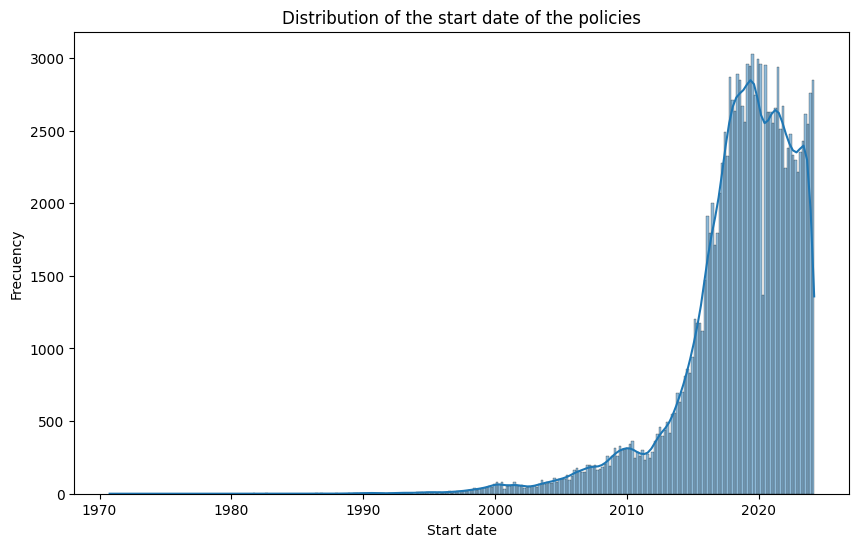

In [1059]:
#Visualization of the distribution of the start dates
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id06', kde=True)
plt.title('Distribution of the start date of the policies')
plt.xlabel('Start date')
plt.ylabel('Frecuency')
plt.show()

In [1060]:
# Calcular el rango intercuartílico (IQR)
Q1 = dataset['id06'].quantile(0.25)
Q3 = dataset['id06'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = (dataset['id06'] < limite_inferior) | (dataset['id06'] > limite_superior)

# Contar el número de outliers
numero_outliers = outliers.sum()
print(f"Número de outliers: {numero_outliers}")

Número de outliers: 6821


There is about 8503 data as the outliers. what can we do with the outliers??????

id07: Previous policy expiration date (maturity -1)

In [1061]:
#dataset['id07'] = pd.to_datetime(dataset['id07'], format='%d/%m/%Y', errors='coerce')
#print(dataset[['id07']].head())

In [1062]:
#Statistical summary of the variable id07
#print(dataset['id07'].describe())

In [1063]:
#Visualization of the distribution of the start dates
#plt.figure(figsize=(10, 6))
#sns.histplot(data=dataset, x='id07', kde=True)
#plt.title('Distribution of the previous policy expiration date')
#plt.xlabel('Previous policy expiration date')
#plt.ylabel('Frecuency')
#plt.show()

What this variable is exactly showing to us????




id08: Policy expiration date

In [1064]:
dataset['id08'] = pd.to_datetime(dataset['id08'], format='%d/%m/%Y', errors='coerce')
print(dataset[['id08']].head())

        id08
0 2023-05-12
3 2023-10-07
6 2023-11-25
7 2019-03-23
9 2020-02-18


In [1065]:
#Statistical summary of the variable id08
print(dataset['id08'].describe())

count                           134067
mean     2022-09-17 07:16:28.028373760
min                2018-01-02 00:00:00
25%                2021-10-27 12:00:00
50%                2023-06-03 00:00:00
75%                2023-10-25 00:00:00
max                2024-03-14 00:00:00
Name: id08, dtype: object


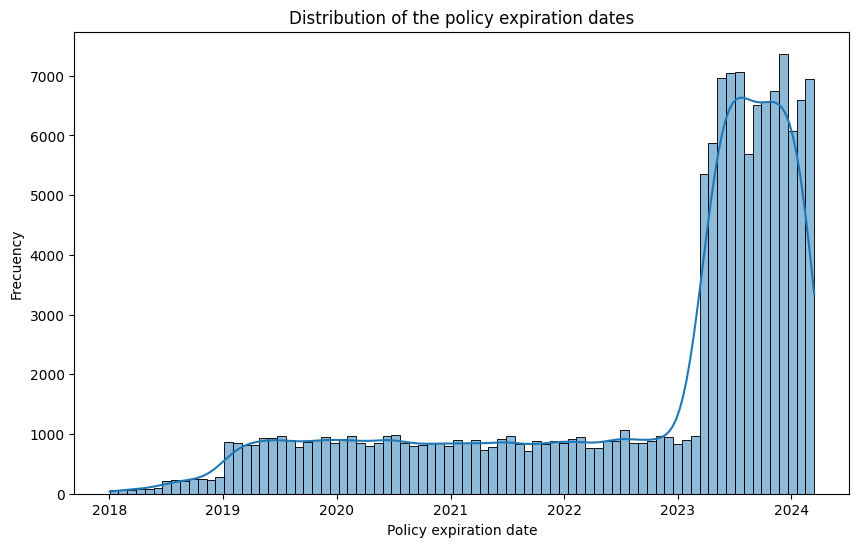

In [1066]:
#Visualization of the distribution of the start dates
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id08', kde=True)
plt.title('Distribution of the policy expiration dates')
plt.xlabel('Policy expiration date')
plt.ylabel('Frecuency')
plt.show()

In [1067]:
# Check if all start dates are before the expiration dates
all_dates_correct = (dataset['id06'] <= dataset['id08']).all()

if all_dates_correct:
    print("All start dates are before the expiration dates in each row.")
else:
    print("There are rows where the start date is not before the expiration date.")


There are rows where the start date is not before the expiration date.


In [1068]:
# Count the number of rows where the start date is not before the expiration date
violated_count = (dataset['id06'] >= dataset['id08']).sum()
print(violated_count)

# Calculate the percentage of rows where the condition is violated
percentage_violated = (violated_count / len(dataset)) * 100

print(f"For {percentage_violated:.2f}% of the rows, the start date is not before the expiration date.")


13722
For 10.24% of the rows, the start date is not before the expiration date.


It seems that for about 10% of the expiration days are before the start dates for each row. What should I do????????

id09: Policy cancellation date. It is null if the cancellation never happened. But we see about 65% of the policies are canceled!

In [1069]:
dataset['id09'] = pd.to_datetime(dataset['id09'], format='%d/%m/%Y', errors='coerce')
print(dataset[['id09']].head())

        id09
0 2023-05-12
3        NaT
6        NaT
7 2018-03-23
9 2019-02-18


In [1070]:
#Statistical summary of the variable id09
print(dataset['id09'].describe())

count                            68680
mean     2021-01-21 19:41:35.049505280
min                2018-01-01 00:00:00
25%                2019-07-04 00:00:00
50%                2021-01-17 00:00:00
75%                2022-07-31 00:00:00
max                2024-09-11 00:00:00
Name: id09, dtype: object


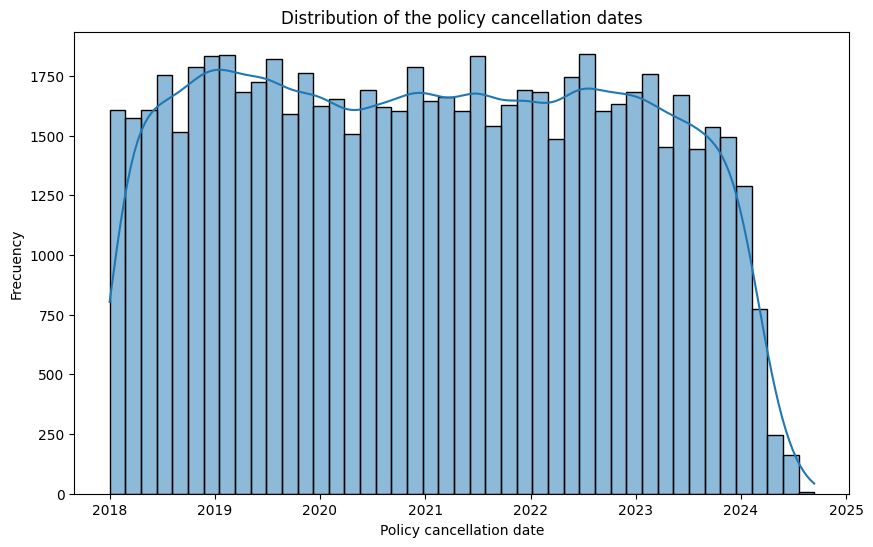

In [1071]:
#Visualization of the distribution of the cancellation dates
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id09', kde=True)
plt.title('Distribution of the policy cancellation dates')
plt.xlabel('Policy cancellation date')
plt.ylabel('Frecuency')
plt.show()

In [1072]:
# Make a copy of the original id09 column
dataset['id09_original'] = dataset['id09']

# Group by client_id and count non-NaN values in cancellation_date
id09_cancellation_counts = dataset.groupby('id01')['id09'].apply(lambda x: x.notna().sum()).reset_index()

# Merge the cancellation counts back to the original DataFrame
dataset = dataset.merge(id09_cancellation_counts, on='id01', how='left')

In [1073]:
dataset.head()

id01  id02   id04       id05  \
0  de1926b3e5b14d5c8c578e6735119507ee895a75     2   6396  FRANCISCO   
1  996e497498d7cf527ec242a38c1b557db7813dac     2  13378     MOISES   
2  842ed0d8f09709db766a280ef486f94cfe9b5f82     2  19315     MANUEL   
3  fbe652abd3cbdc8dc47a7755e8c0ce3665617514     2  24114  VICTORINA   
4  6fc90a1efa553d20b6040ff5e3967dc9d4d9af47     2  27635  FRANCISCO   

        id06       id08     id09_x id11 id13           id14              id15  \
0 1977-05-12 2023-05-12 2023-05-12    B    A  MANTENIMIENTO  AGTES.EXCLUSIVOS   
1 1970-10-07 2023-10-07        NaT    B    A         OPTIMA        CORREDORES   
2 1972-11-25 2023-11-25        NaT    B    F       PROYECTA        CORREDORES   
3 1974-03-23 2019-03-23 2018-03-23    B    Z         OPTIMA      OFIC.ENTIDAD   
4 1975-02-18 2020-02-18 2019-02-18    B    Z    OPTIMA PLUS  AGTES.EXCLUSIVOS   

   id16  id17  id18        id19        id20    id21    id24  id25  id26  id27  \
0  47.0    39   223  23/09/1947  15/02/1980  3801.0  Urbano   1.0     7     0   
1  54.0    30   174  16/07/1922  15/07/1970  3804.0  Urbano   1.0     3     1   
2  52.0   461    40  23/03/1955  23/03/1980  3803.0  Urbano   2.0     3     2   
3  45.0    10     0  23/03/1955  23/03/1980  3430.0     NaN   1.0     1     0   
4  45.0    31   403  23/03/1955  23/03/1980  3740.0     NaN   1.0     1     0   

   id28  id29  id30  id31  id32  id33  id34  id35  id36  id37  id38  id39  \
0     2     0     4     0     8     0    64    21  0.14  0.13  0.19  0.00   
1     2     0     6     0     1     0    63    28  0.08  0.02  0.21  0.00   
2     2     0     5     0     6     0    51    30  0.14  0.12  0.17  0.12   
3     1     1     0     0     2     0    44     0  0.05  0.05  0.00  0.05   
4     1     1     0     0     0     0    44     0  0.00  0.00  0.00  0.00   

   id40      id41     id42     id43     id44    id45    id46     id47    id48  \
0     0  10764.77   858.47  4629.51   183.97   11.98    0.00   111.02    7.22   
1     0   9420.33  1638.80   552.59  1024.33  145.25    0.00   572.90   81.81   
2     0   8833.29  1057.53  1701.88  1834.52  221.81  968.41  1109.25  127.79   
3     0   4342.90   234.72    57.10     0.00    0.00    0.00     0.00    0.00   
4     0   5116.74   659.13     0.00     0.00    0.00    0.00     0.00    0.00   

     id49    id50   id51  id52  id53               id54  id55  id57  id58_1  \
0    0.00   38.35   2.49   0.0     0  ANUAL DOMICILIADO -50.0     2     NaN   
1    0.00  180.63  26.06   0.0     0  ANUAL DOMICILIADO -50.0     0     NaN   
2  544.91  207.25  25.50   0.0     1  ANUAL DOMICILIADO -50.0     6     1.0   
3    0.00  171.03   0.00   0.0     0     ANUAL EFECTIVO -50.0     1     NaN   
4    0.00  193.40  24.92   0.0     0     ANUAL EFECTIVO -50.0     1     NaN   

   id58_2  id58_3      id59     id60     id61  id70  id71 id72  \
0     1.0     NaN  23486.58  1395.65  4278.83  25.0   2.0    G   
1     1.0     NaN      0.00     0.00     0.00  25.0   4.0    G   
2     1.0     NaN   5015.91   633.85  4179.33  43.0   5.0    G   
3     NaN     NaN      0.00     0.00     0.00  52.0   2.0    G   
4     NaN     NaN      0.00     0.00     0.00  45.0   5.0    G   

   SINCOTotalVehiculos  SINCOMatriculaIncluida  AceptoCulpaSinAntecedentes  \
0                  NaN                     NaN                           0   
1                  NaN                     NaN                           0   
2                  NaN                     NaN                           0   
3                  NaN                     NaN                           0   
4                  NaN                     NaN                           0   

   ContrataLunas  ContrataAsistencia  ContrataDanyosPropios    DGC_001  \
0              0                   0                      0  23.548370   
1              0                   1                      0  17.803063   
2              0                   1                      0  14.475808   
3              0                   1               

In [1074]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id09_y'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique scores.")
else:
    print("All client IDs have unique scores.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique scores: {percentage_non_unique:.2f}%")

All client IDs have unique scores.
Percentage of client IDs with non-unique scores: 0.00%


In [1075]:
dataset.fillna({'id09_original': dataset['id08']}, inplace=True)

In [1076]:
# Calculate policy duration in days
dataset['policy_duration'] = (dataset['id09_original'] - dataset['id06']).dt.days

# Group by 'id01' and sum the policy durations
dataset['client_days_loyalty'] = dataset.groupby('id01')['policy_duration'].transform('sum')
# Replace negative values with zero
dataset['client_days_loyalty'] = dataset['client_days_loyalty'].apply(lambda x: max(0, x))

In [1077]:
dataset['policy_duration'].describe()

count    134067.000000
mean       1412.850411
std        1552.303644
min        -249.000000
25%         365.000000
50%         913.000000
75%        1826.000000
max       19358.000000
Name: policy_duration, dtype: float64

In [1078]:
dataset['client_days_loyalty'].describe()

count    134067.000000
mean       2421.062282
std        2475.578720
min           0.000000
25%         730.000000
50%        1643.000000
75%        3287.000000
max       27026.000000
Name: client_days_loyalty, dtype: float64

In [1079]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['client_days_loyalty'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique scores.")
else:
    print("All client IDs have unique scores.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique scores: {percentage_non_unique:.2f}%")

All client IDs have unique scores.
Percentage of client IDs with non-unique scores: 0.00%


Fill NaN values in the 'id09' column with the expiration date of the same row

In [1080]:
# Check if all start dates are before the cancellation dates
#all_dates_correct = (dataset['id06'] <= dataset['id09']).all()

#if all_dates_correct:
#    print("All start dates are before the cancellation dates in each row.")
#else:
#    print("There are rows where the start date is not before the cancellation date.")

In [1081]:
# Check if all start dates are before the cancellation dates
#all_dates_correct = (dataset['id09'] <= dataset['id08']).all()

#if all_dates_correct:
#    print("All cancellation dates are before the expiration dates in each row.")
#else:
#    print("There are rows where the cancellation date is not before the expiration date.")

In [1082]:
# Count the number of rows where the start date is not before the expiration date
#violated_count = (dataset['id09'] == dataset['id08']).sum()
#print(violated_count)

# Calculate the percentage of rows where the condition is violated
#percentage_violated = (violated_count / len(dataset)) * 100

#print(f"For {percentage_violated:.2f}% of the rows, the cancellation date is not before the expiration date.")

In [1083]:
# Identify negative values
#negative_values = dataset['policy_duration'] < 0

# Calculate total number of negative values
#total_negative_values = negative_values.sum()

# Calculate total number of values in the 'client_days_loyalty' column
#total_values = dataset['policy_duration'].count()

# Calculate the percentage of negative values
#percentage_negative_values = (total_negative_values / total_values) * 100

#print(f"Percentage of negative values in 'policy_duration': {percentage_negative_values:.2f}%")


In [1084]:
#duration_in_years = ((dataset.loc[dataset['id09'].notna(), 'id09'] - dataset.loc[dataset['id09'].notna(), 'id06']).dt.days / 365).mean()
#print("Average duration of the policies before cancellation:", duration_in_years, "years")

id10: Reason of the policy cancellation.

In [1085]:
#dataset['id10'].unique()

In [1086]:
#dataset['id10'].nunique()

I quess we don't need the reasons of the cancellation of policies.

id11: clients scores on the expiration date.

In [1087]:
dataset['id11'].unique()

array(['B', 'A', 'AA', 'CC', 'CCCC', 'N', 'CCCCC', 'NN', 'C', 'BB', 'CCC'],
      dtype=object)

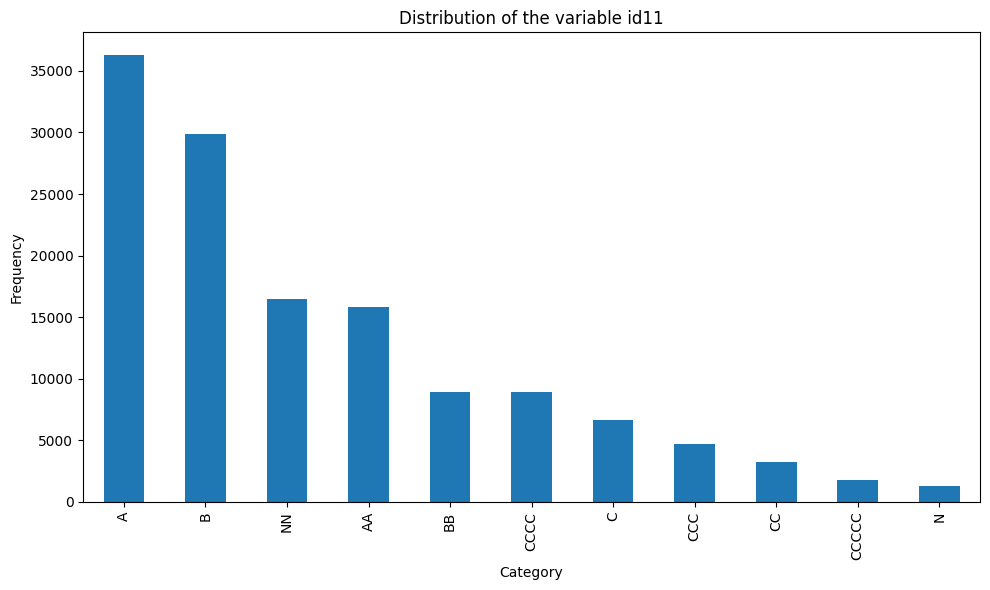

In [1088]:
# Obtener la frecuencia de cada categoría en 'id11'
categorias_id11 = dataset['id11'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
categorias_id11.plot(kind='bar')
plt.title('Distribution of the variable id11')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [1089]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id11'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique scores.")
else:
    print("All client IDs have unique scores.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique scores: {percentage_non_unique:.2f}%")

Some client IDs have non-unique scores.
Percentage of client IDs with non-unique scores: 9.24%


In [1090]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id05')['id11'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some policy holders have non-unique scores.")
else:
    print("All policy holders have unique scores.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of policy holders with non-unique scores: {percentage_non_unique:.2f}%")

Some policy holders have non-unique scores.
Percentage of policy holders with non-unique scores: 31.50%


I don't know the scores in id11 are for the clients or policies. Considering the analysis above, we can say that about 9% of the client IDs (id01) have non-unique scores. So what cleaning should have been done in here (????????)

Just taking the last score of each ID

In [1091]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'id11'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores = dataset.groupby('id01')['id11'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['id11'] = dataset['id11_last']

# Drop the columns used for merging
dataset.drop(columns=['id11_last'], inplace=True)

In [1092]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id11'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique scores.")
else:
    print("All client IDs have unique scores.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique scores: {percentage_non_unique:.2f}%")

All client IDs have unique scores.
Percentage of client IDs with non-unique scores: 0.00%


id13: Global score of the clients.

In [1093]:
dataset['id13'].unique()

array(['I', 'F', 'D', 'E', 'B', 'C', 'H', 'G', 'A', 'Z', nan],
      dtype=object)

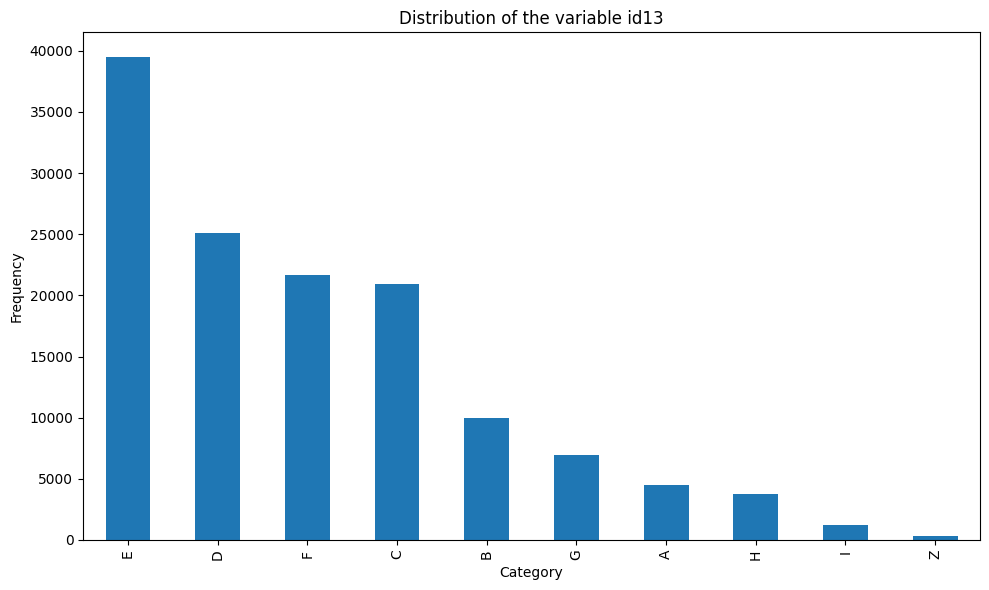

In [1094]:
# Obtener la frecuencia de cada categoría en 'id13'
categorias_id13 = dataset['id13'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
categorias_id13.plot(kind='bar')
plt.title('Distribution of the variable id13')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Muestra el gráfico
plt.tight_layout()
plt.show()

Filling the 7 missing values with the highly repeated value.

In [1095]:
most_frequent_value = dataset['id13'].mode()[0]
dataset['id13'] = dataset['id13'].fillna(most_frequent_value)

In [1096]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id13'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique scores.")
else:
    print("All client IDs have unique scores.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique scores: {percentage_non_unique:.2f}%")

Some client IDs have non-unique scores.
Percentage of client IDs with non-unique scores: 5.95%


In [1097]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id05')['id13'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some policy holders have non-unique scores.")
else:
    print("All policy holders have unique scores.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of policy holders with non-unique scores: {percentage_non_unique:.2f}%")

Some policy holders have non-unique scores.
Percentage of policy holders with non-unique scores: 27.59%


I don't know the scores in id13 are for the clients or policies. Considering the analysis above, we can say that about 7% of the client IDs (id01) have non-unique scores. So what cleaning should have been done in here (????????)

In [1098]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'id13'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_id13 = dataset.groupby('id01')['id13'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_id13, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['id13'] = dataset['id13_last']

# Drop the columns used for merging
dataset.drop(columns=['id13_last'], inplace=True)

In [1099]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id13'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique scores.")
else:
    print("All client IDs have unique scores.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique scores: {percentage_non_unique:.2f}%")

All client IDs have unique scores.
Percentage of client IDs with non-unique scores: 0.00%


id14: mediation network score.

the result are highest to lowest quality as follows: OPTIMAL, PROJECT, ADVANCE. After the above, the EXPANDE category can be displayed, referring to the Great Corridor. Additionally, the label “Intervene” may appear in the categories, which indicates special restrictive rules for said mediator. The START categories may appear, indicating a mediator who has recently joined the company.

In [1100]:
dataset['id14'].unique()

array(['PROYECTA', 'EXPANDE', 'OPTIMA', 'OPTIMA PLUS', 'AVANZA', 'INICIA',
       'MANTENIMIENTO'], dtype=object)

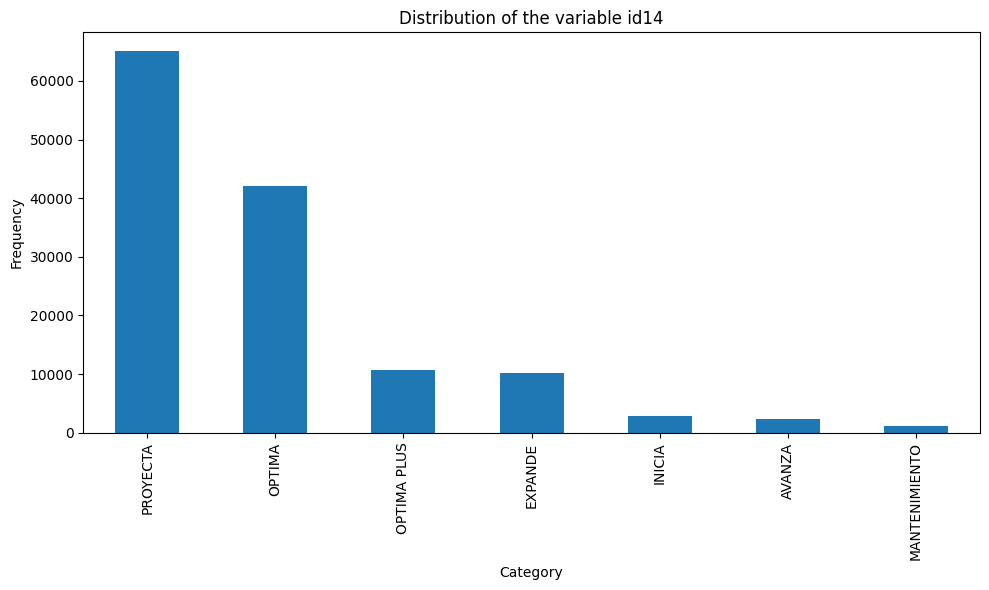

In [1101]:
# Obtener la frecuencia de cada categoría en 'id14'
categorias_id14 = dataset['id14'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
categorias_id14.plot(kind='bar')
plt.title('Distribution of the variable id14')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [1102]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id14'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique scores.")
else:
    print("All client IDs have unique scores.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique scores: {percentage_non_unique:.2f}%")

Some client IDs have non-unique scores.
Percentage of client IDs with non-unique scores: 0.70%


In [1103]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'id14'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_id14 = dataset.groupby('id01')['id14'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_id14, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['id14'] = dataset['id14_last']

# Drop the columns used for merging
dataset.drop(columns=['id14_last'], inplace=True)

In [1104]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id14'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique scores.")
else:
    print("All client IDs have unique scores.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique scores: {percentage_non_unique:.2f}%")

All client IDs have unique scores.
Percentage of client IDs with non-unique scores: 0.00%


It seems that the mediations are the same with clien IDs since in most of the times the IDs have a unque mediator rank. (???????)

id15: cacal Id or policy contracting channel.

In [1105]:
dataset['id15'].unique()

array(['CORREDORES', 'AGTES.EXCLUSIVOS', 'AGTES.VINCULADOS',
       'OFIC.ENTIDAD', 'EMPLEADOS'], dtype=object)

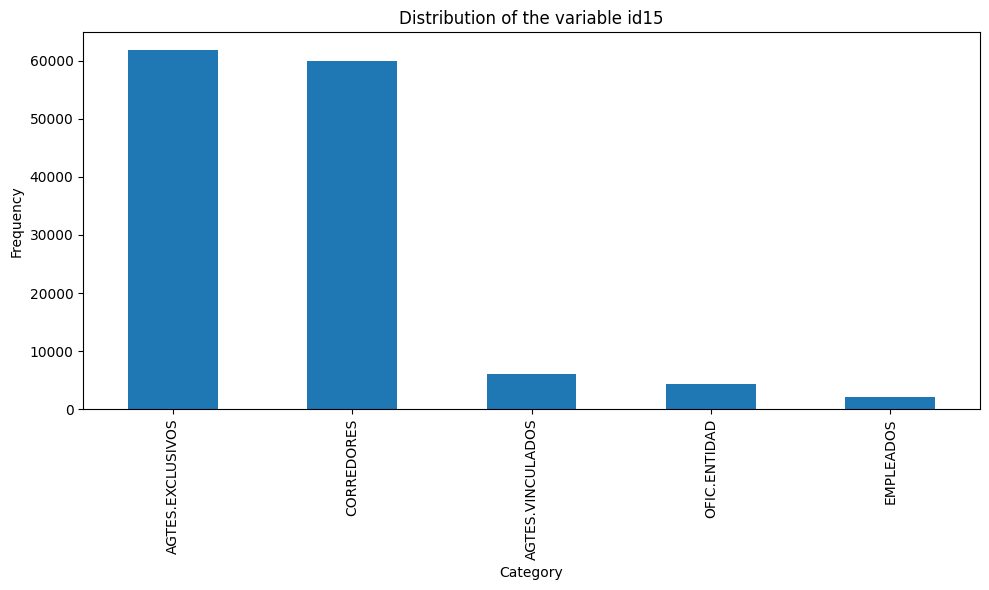

In [1106]:
# Obtener la frecuencia de cada categoría en 'id15'
categorias_id15 = dataset['id15'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
categorias_id15.plot(kind='bar')
plt.title('Distribution of the variable id15')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [1107]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id15'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique scores.")
else:
    print("All client IDs have unique scores.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique scores: {percentage_non_unique:.2f}%")

Some client IDs have non-unique scores.
Percentage of client IDs with non-unique scores: 0.66%


It seems that each ID in id01 has a unique canal ID since for 0.7% of them a unique value exists.

In [1108]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'id15'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_id15 = dataset.groupby('id01')['id15'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_id15, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['id15'] = dataset['id15_last']

# Drop the columns used for merging
dataset.drop(columns=['id15_last'], inplace=True)

In [1109]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id15'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique scores.")
else:
    print("All client IDs have unique scores.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique scores: {percentage_non_unique:.2f}%")

All client IDs have unique scores.
Percentage of client IDs with non-unique scores: 0.00%


id16: Age of the client in company in years.

In [1110]:
dataset['id16'].nunique()

61

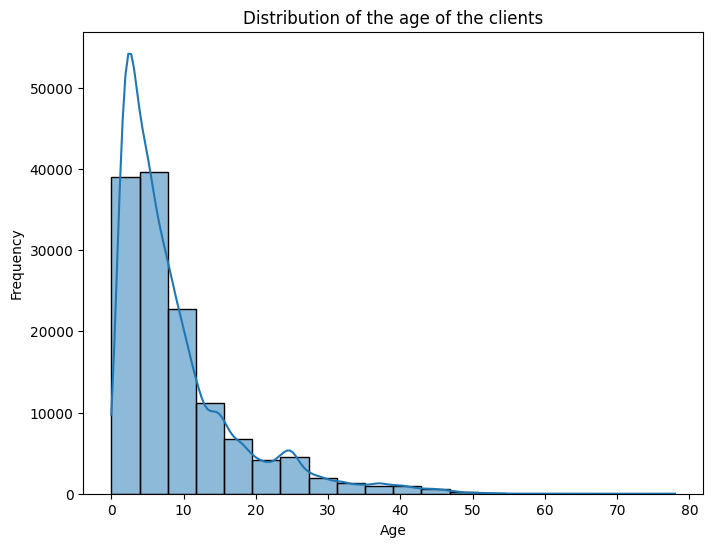

In [1111]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='id16', bins=20, kde=True)
plt.title('Distribution of the age of the clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


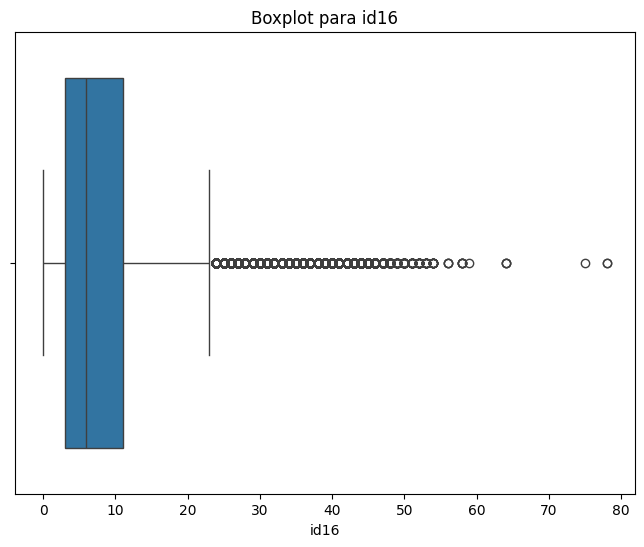

Número total de outliers en 'id16': 10553


In [1112]:
# Crear un boxplot para la columna 'id16'
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['id16'])
plt.title('Boxplot para id16')
plt.show()

# Calcular el rango intercuartílico (IQR) para la columna 'id16'
Q1 = dataset['id16'].quantile(0.25)
Q3 = dataset['id16'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = dataset[(dataset['id16'] < limite_inferior) | (dataset['id16'] > limite_superior)]

# Contar el número de outliers
numero_outliers = len(outliers)

# Imprimir el resultado
print(f"Número total de outliers en 'id16': {numero_outliers}")

In [1113]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id16'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique age.")
else:
    print("All client IDs have unique age.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique ages: {percentage_non_unique:.2f}%")

All client IDs have unique age.
Percentage of client IDs with non-unique ages: 0.00%


It seems that the ages (id16) are unique for each of the IDs in id01.

What can we do with the outliers in this variable????????

id17: The agency code for each policy.

In [1114]:
dataset['id17'].nunique()

29

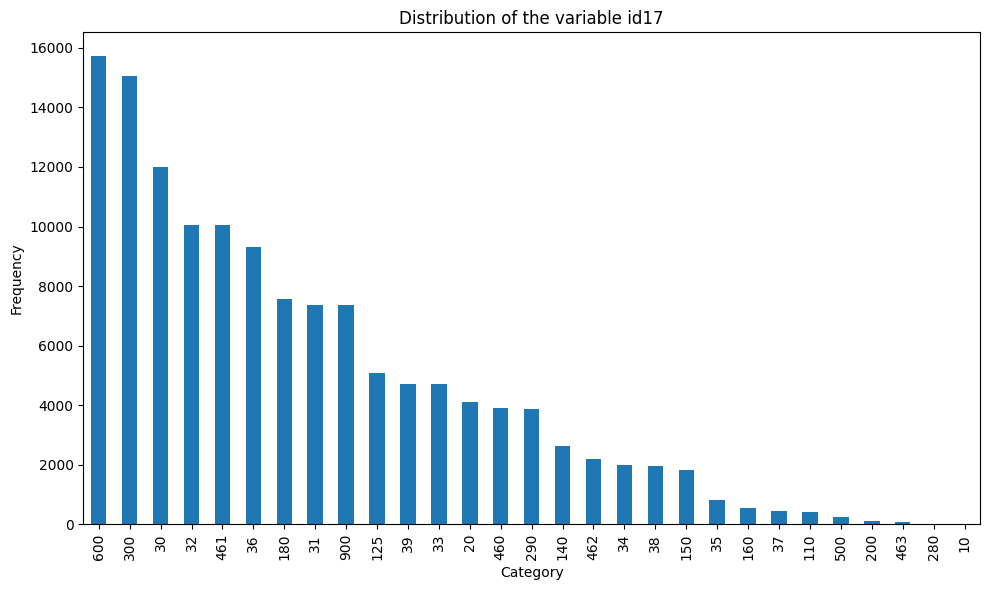

In [1115]:
# Obtener la frecuencia de cada categoría en 'id17'
categorias_id17 = dataset['id17'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
categorias_id17.plot(kind='bar')
plt.title('Distribution of the variable id17')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [1116]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id17'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique agency.")
else:
    print("All client IDs have unique agency.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique ageency: {percentage_non_unique:.2f}%")

Some client IDs have non-unique agency.
Percentage of client IDs with non-unique ageency: 0.63%


It seems that the ageencies (id17) are unique for each of the IDs in id01.

In [1117]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'id17'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_id17 = dataset.groupby('id01')['id17'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_id17, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['id17'] = dataset['id17_last']

# Drop the columns used for merging
dataset.drop(columns=['id17_last'], inplace=True)

In [1118]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id17'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique agency.")
else:
    print("All client IDs have unique agency.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique ageency: {percentage_non_unique:.2f}%")

All client IDs have unique agency.
Percentage of client IDs with non-unique ageency: 0.00%


id18: the code for the subagencies.

In [1119]:
dataset['id18'].nunique()

291

In [1120]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id18'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique sub-agency.")
else:
    print("All client IDs have unique sub-agency.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique sub-agency: {percentage_non_unique:.2f}%")

Some client IDs have non-unique sub-agency.
Percentage of client IDs with non-unique sub-agency: 1.62%


It seems that the sub-agencies (id18) are unique for each of the IDs in id01.

In [1121]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'id18'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_id18 = dataset.groupby('id01')['id18'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_id18, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['id18'] = dataset['id18_last']

# Drop the columns used for merging
dataset.drop(columns=['id18_last'], inplace=True)

In [1122]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id18'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique sub-agency.")
else:
    print("All client IDs have unique sub-agency.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique sub-agency: {percentage_non_unique:.2f}%")

All client IDs have unique sub-agency.
Percentage of client IDs with non-unique sub-agency: 0.00%


id19: Date of birth of the driver of the policy.

In [1123]:
dataset['id19'] = pd.to_datetime(dataset['id19'], format='%d/%m/%Y', errors='coerce')
print(dataset[['id19']].head())

        id19
0 1984-05-28
1 1995-10-23
2 1997-03-22
3 1977-12-24
4 1977-12-24


In [1124]:
#Statistical summary of the variable id19
print(dataset['id19'].describe())

count                           134037
mean     1972-02-08 03:42:59.923453984
min                1680-05-31 00:00:00
25%                1962-07-29 00:00:00
50%                1972-03-20 00:00:00
75%                1982-07-23 00:00:00
max                2018-09-28 00:00:00
Name: id19, dtype: object


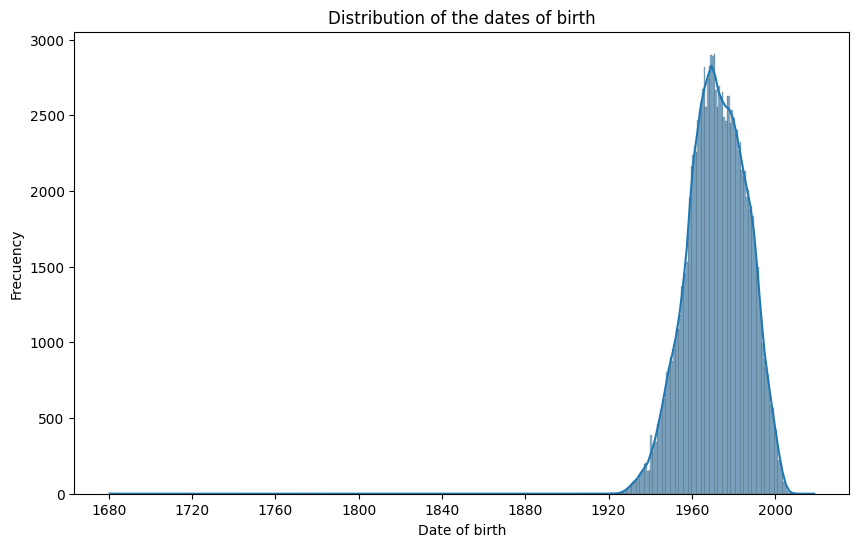

In [1125]:
#Visualization of the distribution of the start dates
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id19', kde=True)
plt.title('Distribution of the dates of birth')
plt.xlabel('Date of birth')
plt.ylabel('Frecuency')
plt.show()

C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


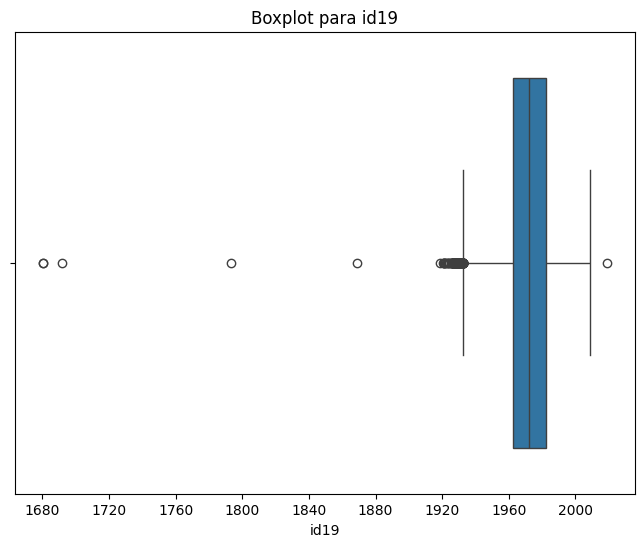

Número total de outliers en 'id19': 355


In [1126]:
# Crear un boxplot para la columna 'id19'
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['id19'])
plt.title('Boxplot para id19')
plt.show()

# Calcular el rango intercuartílico (IQR) para la columna 'id16'
Q1 = dataset['id19'].quantile(0.25)
Q3 = dataset['id19'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = dataset[(dataset['id19'] < limite_inferior) | (dataset['id19'] > limite_superior)]

# Contar el número de outliers
numero_outliers = len(outliers)

# Imprimir el resultado
print(f"Número total de outliers en 'id19': {numero_outliers}")

In [1127]:
# Count the number of dates of birth before 1900
num_before_1900 = (dataset['id19'].dt.year < 1900).sum()
num_before_1900

5

In [1128]:
# Replace dates before 1900 with NaN
dataset.loc[dataset['id19'].dt.year < 1900, 'date_of_birth'] = pd.NaT

In [1129]:
#change the dates to numbers to have actual age for each client.
from datetime import datetime

# Calcula la diferencia en años
def calculateAge(fecha_nacimiento):
    fecha_actual = datetime.now()
    edad = fecha_actual.year - fecha_nacimiento.year - ((fecha_actual.month, fecha_actual.day) < (fecha_nacimiento.month, fecha_nacimiento.day))
    return edad

dataset['id19'] = pd.to_datetime(dataset['id19'], errors='coerce')
dataset['id19'].apply(calculateAge)

dataset['Age'] = dataset['id19'].apply(calculateAge)
dataset = dataset.drop(['id19'], axis=1)
dataset['Age'].describe()

count    134037.000000
mean         51.885464
std          14.101754
min           5.000000
25%          41.000000
50%          52.000000
75%          61.000000
max         344.000000
Name: Age, dtype: float64

In [1130]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['Age'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique DOB.")
else:
    print("All client IDs have unique DOB.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique DOB: {percentage_non_unique:.2f}%")

Some client IDs have non-unique DOB.
Percentage of client IDs with non-unique DOB: 5.68%


In [1131]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'Age'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_Age = dataset.groupby('id01')['Age'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_Age, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['Age'] = dataset['Age_last']

# Drop the columns used for merging
dataset.drop(columns=['Age_last'], inplace=True)

In [1132]:
#Filling the missing values by 0
dataset['Age']= dataset['Age'].fillna(0)

Text(0.5, 1.0, 'Distribusion of Ages ')

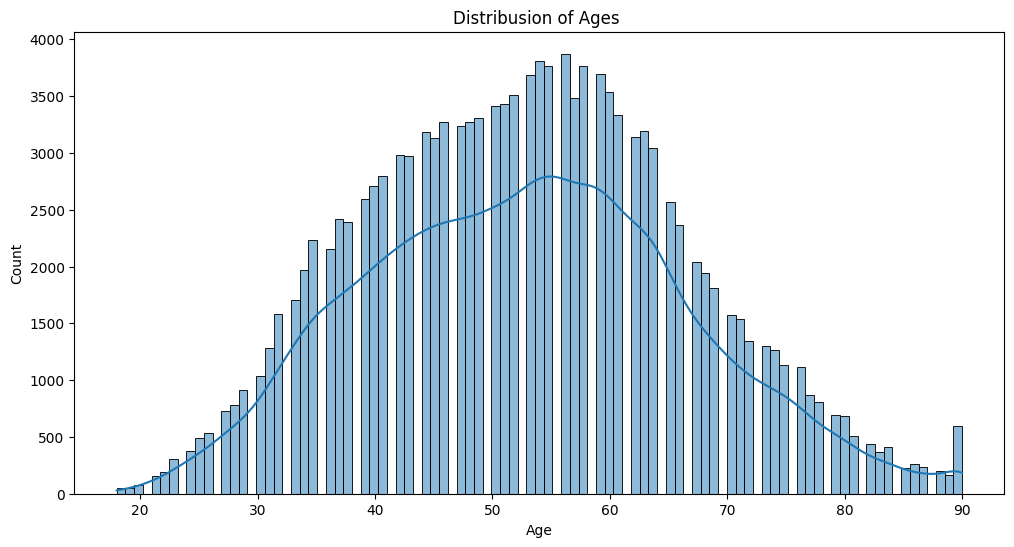

In [1133]:
# Calcular el rango intercuartílico (IQR) para la variable 'Edad'
Q1 = dataset['Age'].quantile(0.25)
Q3 = dataset['Age'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = dataset[(dataset['Age'] < limite_inferior) | (dataset['Age'] > limite_superior)]

# Acotar la variable 'Edad' entre 18 y 90 años
dataset['Age'] = dataset['Age'].clip(lower=18, upper=90)

# Visualizar la distribución de 'Edad' antes y después de acotar
plt.figure(figsize=(12, 6))

sns.histplot(data=dataset, x='Age', kde=True)
plt.title('Distribusion of Ages ')

id20: Drivers' licenses starting date.

In [1134]:
dataset['id20'] = pd.to_datetime(dataset['id20'], format='%d/%m/%Y', errors='coerce')
print(dataset[['id20']].head())

        id20
0 2002-12-15
1 2014-06-17
2 2017-11-23
3 2007-04-10
4 2007-04-10


In [1135]:
#Statistical summary of the variable id20
print(dataset['id20'].describe())

count                           134067
mean     1995-03-15 23:07:43.442905472
min                1944-06-16 00:00:00
25%                1985-02-05 00:00:00
50%                1995-10-19 00:00:00
75%                2006-03-24 00:00:00
max                2070-04-28 00:00:00
Name: id20, dtype: object


C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


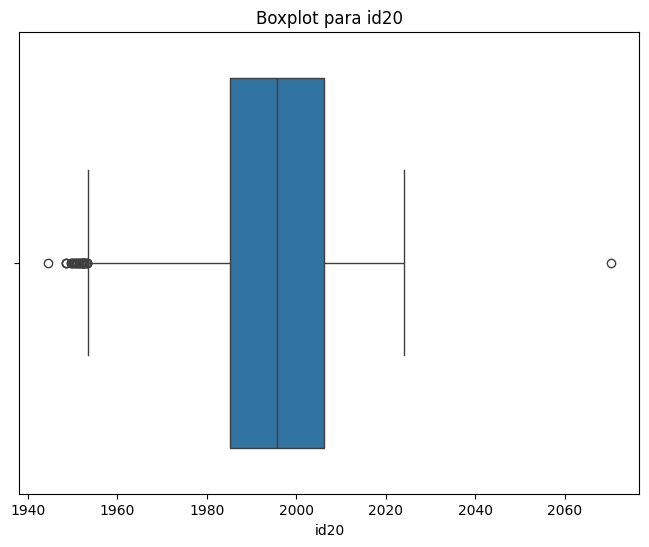

Número total de outliers en 'id20': 32


In [1136]:
# Crear un boxplot para la columna 'id20'
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['id20'])
plt.title('Boxplot para id20')
plt.show()

# Calcular el rango intercuartílico (IQR) para la columna 'id20'
Q1 = dataset['id20'].quantile(0.25)
Q3 = dataset['id20'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = dataset[(dataset['id20'] < limite_inferior) | (dataset['id20'] > limite_superior)]

# Contar el número de outliers
numero_outliers = len(outliers)

# Imprimir el resultado
print(f"Número total de outliers en 'id20': {numero_outliers}")

In [1137]:
# Replace dates before 1900 with NaN
dataset.loc[(dataset['id20'] < limite_inferior) | (dataset['id20'] > limite_superior), 'id20'] = pd.NaT

In [1138]:
# Fill missing values with 0
dataset['id20'] = dataset['id20'].fillna(0)

In [1139]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id20'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique date.")
else:
    print("All client IDs have unique date.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique ate: {percentage_non_unique:.2f}%")

Some client IDs have non-unique date.
Percentage of client IDs with non-unique ate: 6.03%


id21: Postal code of the policy holder.

In [1140]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id21'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique postal code.")
else:
    print("All client IDs have unique postal code.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique postal code: {percentage_non_unique:.2f}%")

All client IDs have unique postal code.
Percentage of client IDs with non-unique postal code: 0.00%


C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


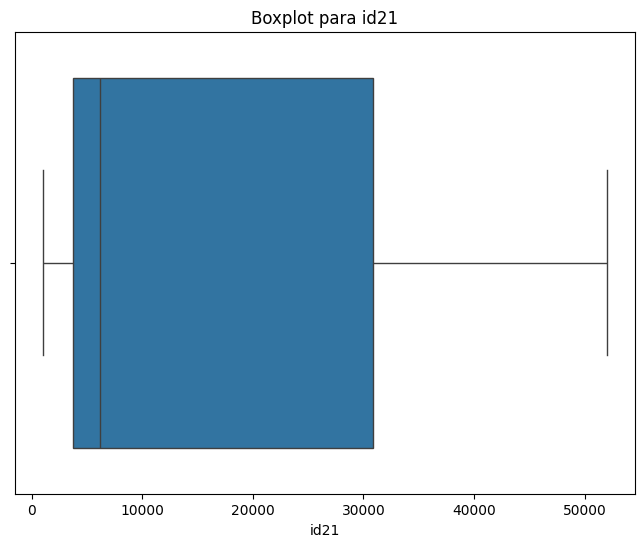

In [1141]:
# Crear un boxplot para la columna 'id21'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id21', data=dataset)
plt.title('Boxplot para id21')
plt.xlabel('id21')
plt.show()

In [1142]:
#Filling the missing values by 0
dataset['id21']= dataset['id21'].fillna(0)

id24

In [1143]:
dataset['id24'].unique()

array([nan, 'Urbano'], dtype=object)

In [1144]:
# Reemplaza los valores NaN por 'Rural' en la columna id24 (Rural / Urbano)
dataset['id24'].fillna('Rural', inplace=True)

# Verifica los cambios
print(dataset['id24'].value_counts())

id24
Rural     99244
Urbano    34823
Name: count, dtype: int64


C:\Users\EGHORB~1\AppData\Local\Temp/ipykernel_17604/1841214662.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['id24'].fillna('Rural', inplace=True)


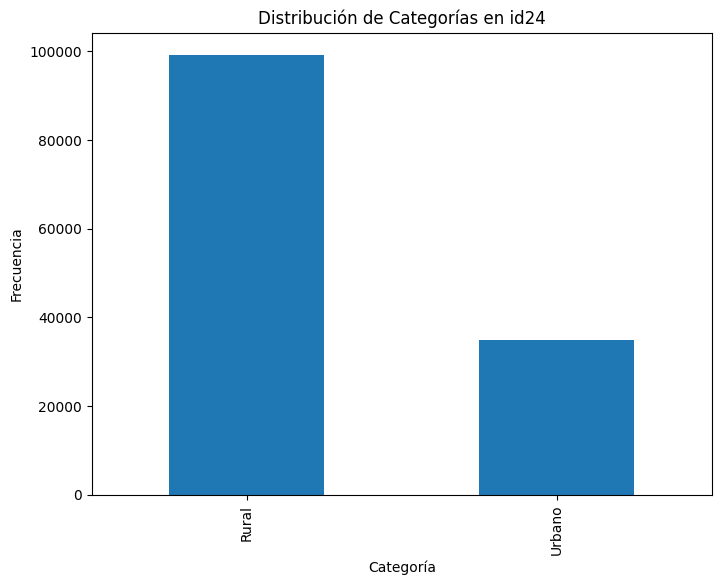

In [1145]:
plt.figure(figsize=(8, 6))
dataset['id24'].value_counts().plot(kind='bar')
plt.title('Distribución de Categorías en id24')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

In [1146]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id24'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique info.")
else:
    print("All client IDs have unique info.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique info: {percentage_non_unique:.2f}%")

All client IDs have unique info.
Percentage of client IDs with non-unique info: 0.00%


id25:Number of policies in force of the client in the entity.

In [1147]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id25'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique No. of policies.")
else:
    print("All client IDs have unique No. of policies.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique No. of policies: {percentage_non_unique:.2f}%")

Some client IDs have non-unique No. of policies.
Percentage of client IDs with non-unique No. of policies: 11.39%


In [1148]:
print(dataset['id25'].describe())

count    134067.000000
mean          2.029634
std           1.875234
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          81.000000
Name: id25, dtype: float64


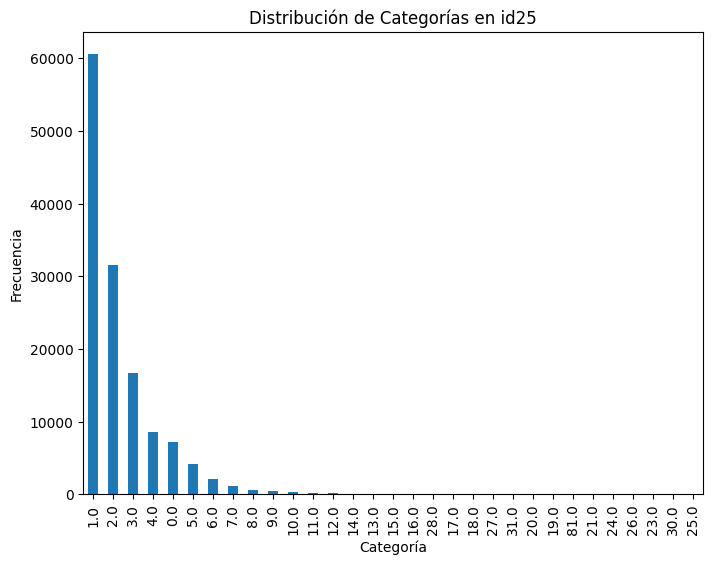

In [1149]:
plt.figure(figsize=(8, 6))
dataset['id25'].value_counts().plot(kind='bar')
plt.title('Distribución de Categorías en id25')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

In [1150]:
print(dataset['id25'].value_counts())

id25
1.0     60569
2.0     31512
3.0     16741
4.0      8644
0.0      7184
5.0      4145
6.0      2077
7.0      1188
8.0       630
9.0       398
10.0      318
11.0      137
12.0      118
14.0       89
13.0       78
15.0       46
16.0       35
28.0       35
17.0       31
18.0       22
27.0       17
31.0       15
20.0       15
19.0        8
81.0        6
21.0        4
24.0        1
26.0        1
23.0        1
30.0        1
25.0        1
Name: count, dtype: int64


In [1151]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'id25'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_id25 = dataset.groupby('id01')['id25'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_id25, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['id25'] = dataset['id25_last']

# Drop the columns used for merging
dataset.drop(columns=['id25_last'], inplace=True)

In [1152]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id25'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique No. of policies.")
else:
    print("All client IDs have unique No. of policies.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique No. of policies: {percentage_non_unique:.2f}%")

All client IDs have unique No. of policies.
Percentage of client IDs with non-unique No. of policies: 0.00%


id26: Maximum number of policies that a client has had in force at the entity.

In [1153]:
dataset['id26'].describe()

count    134067.000000
mean          2.747746
std           2.290395
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          81.000000
Name: id26, dtype: float64

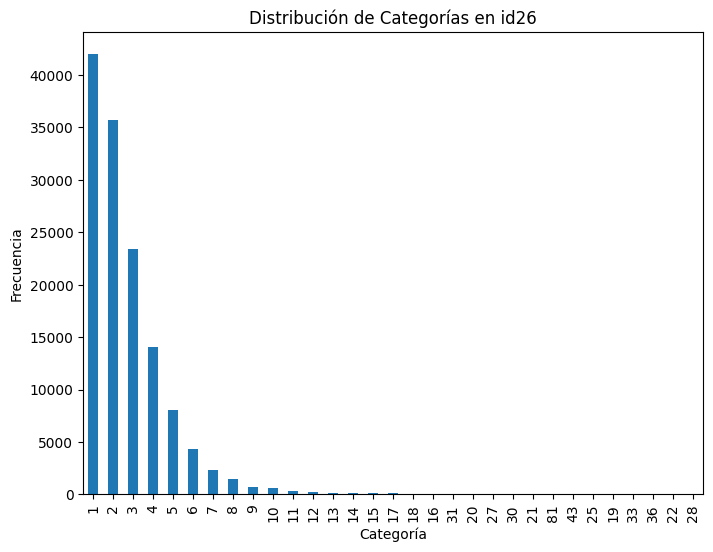

In [1154]:
plt.figure(figsize=(8, 6))
dataset['id26'].value_counts().plot(kind='bar')
plt.title('Distribución de Categorías en id26')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

In [1155]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id26'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique max No. of policies.")
else:
    print("All client IDs have unique max No. of policies.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique max No. of policies: {percentage_non_unique:.2f}%")

All client IDs have unique max No. of policies.
Percentage of client IDs with non-unique max No. of policies: 0.00%


id27: Number of branches currently contracted by the client.

In [1156]:
dataset['id27'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [1157]:
dataset['id27'].describe()

count    134067.000000
mean          0.773464
std           0.672548
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: id27, dtype: float64

In [1158]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id27'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique No. of branches.")
else:
    print("All client IDs have unique No. of branches.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique No. of branches: {percentage_non_unique:.2f}%")

All client IDs have unique No. of branches.
Percentage of client IDs with non-unique No. of branches: 0.00%


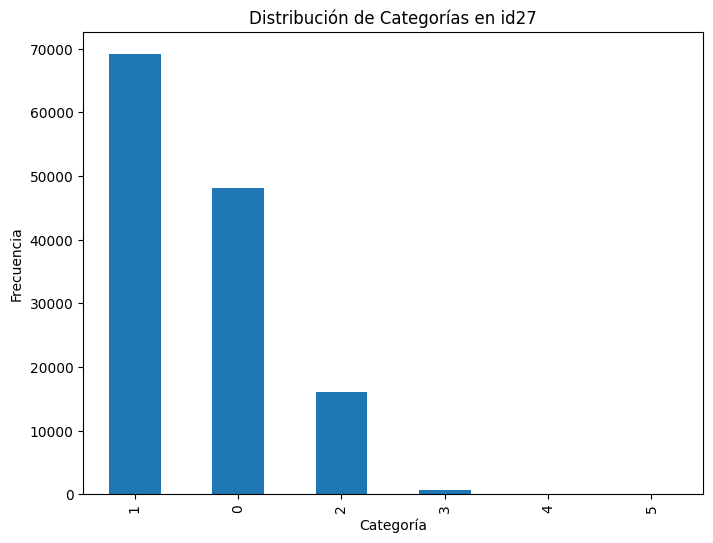

In [1159]:
plt.figure(figsize=(8, 6))
dataset['id27'].value_counts().plot(kind='bar')
plt.title('Distribución de Categorías en id27')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

id28: Maximum number of lines contracted by the client at a time in their life.

In [1160]:
dataset['id28'].unique()

array([1, 4, 2, 3, 5, 6, 7], dtype=int64)

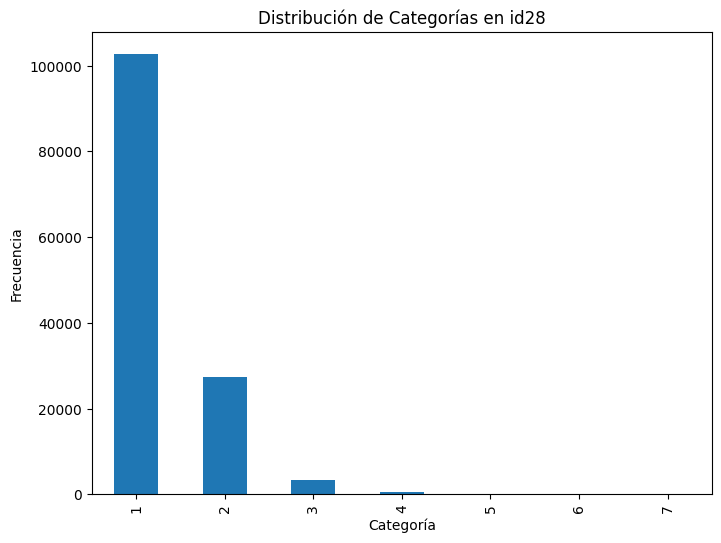

In [1161]:
plt.figure(figsize=(8, 6))
dataset['id28'].value_counts().plot(kind='bar')
plt.title('Distribución de Categorías en id28')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

In [1162]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id28'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique No. of lines.")
else:
    print("All client IDs have unique No. of lines.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique No. of lines: {percentage_non_unique:.2f}%")

All client IDs have unique No. of lines.
Percentage of client IDs with non-unique No. of lines: 0.00%


id29: Maximum number of lines contracted by the client at a time in their life.

In [1163]:
dataset['id29'].nunique()

25

In [1164]:
print(dataset['id29'].value_counts())

id29
0     72980
1     50692
2      7757
3      1674
4       508
5       166
6        87
7        48
8        28
9        27
11       16
13       13
18       13
10       12
19        9
17        7
20        6
15        5
16        5
12        4
21        4
25        2
14        2
23        1
22        1
Name: count, dtype: int64


In [1165]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id29'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique No. of canceled policies.")
else:
    print("All client IDs have unique No. of canceled policies.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique No. of canceled policies: {percentage_non_unique:.2f}%")

Some client IDs have non-unique No. of canceled policies.
Percentage of client IDs with non-unique No. of canceled policies: 13.61%


In [1166]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'id29'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_id29 = dataset.groupby('id01')['id29'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_id29, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['id29'] = dataset['id29_last']

# Drop the columns used for merging
dataset.drop(columns=['id29_last'], inplace=True)

In [1167]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id29'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique No. of canceled policies.")
else:
    print("All client IDs have unique No. of canceled policies.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique No. of canceled policies: {percentage_non_unique:.2f}%")

All client IDs have unique No. of canceled policies.
Percentage of client IDs with non-unique No. of canceled policies: 0.00%


id30: Historical number of miscellaneous claims.

In [1168]:
dataset['id30'].unique()

array([ 0, 23,  2,  5,  8,  1,  3, 12,  4,  6,  9,  7, 17, 11, 10, 24, 15,
       16, 18, 21, 14, 45, 20, 55, 19, 29, 22, 35, 13, 27, 28, 30, 42, 34,
       31, 25, 60, 26, 39, 46, 47, 43, 37, 58, 38, 32, 33, 66, 40, 71, 36,
       54, 49, 93, 41, 44], dtype=int64)

In [1169]:
print(dataset['id29'].value_counts())

id29
0     60197
1     55398
2     12891
3      3392
4      1125
5       407
6       230
7       158
8        50
25       39
10       37
13       35
11       32
9        29
21       22
14       13
16       10
20        2
Name: count, dtype: int64


In [1170]:
dataset['id29'].describe()

count    134067.000000
mean          0.775985
std           1.092377
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max          25.000000
Name: id29, dtype: float64

id30: Historical number of miscellaneous claims.

In [1171]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id30'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique No. of miscellaneous claims.")
else:
    print("All client IDs have unique No. of miscellaneous claims.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique No. of miscellaneous claims: {percentage_non_unique:.2f}%")

All client IDs have unique No. of miscellaneous claims.
Percentage of client IDs with non-unique No. of miscellaneous claims: 0.00%


C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


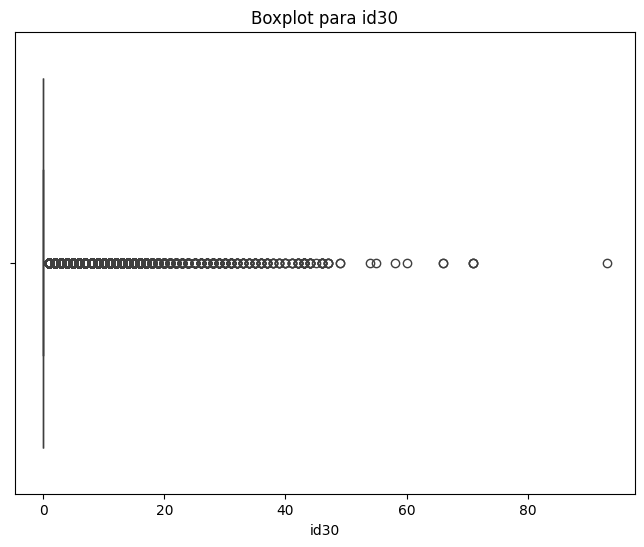

In [1172]:
# Crear un boxplot para la columna 'id21'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id30', data=dataset)
plt.title('Boxplot para id30')
plt.xlabel('id30')
plt.show()

id31:Number of claims during the reference year of Miscellaneous

In [1173]:
dataset['id31'].unique()

array([ 0,  1,  2,  4,  3,  8,  9,  7,  6,  5, 10, 12, 11, 15],
      dtype=int64)

In [1174]:
dataset['id31'].describe()

count    134067.000000
mean          0.040786
std           0.339396
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: id31, dtype: float64

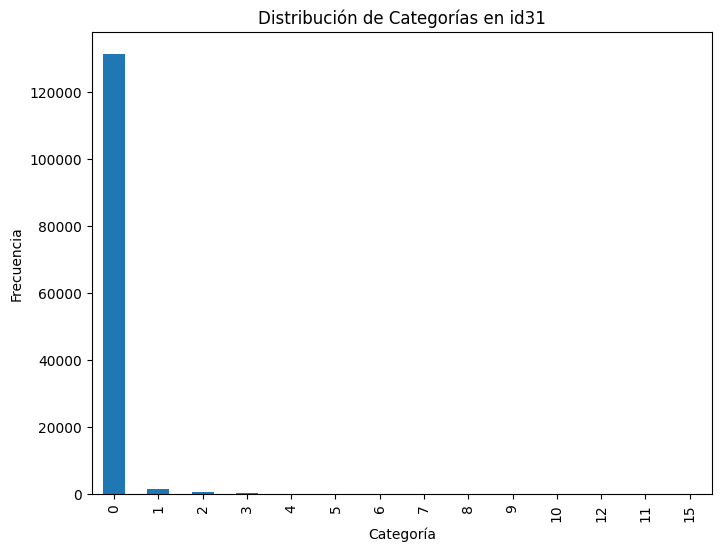

In [1175]:
plt.figure(figsize=(8, 6))
dataset['id31'].value_counts().plot(kind='bar')
plt.title('Distribución de Categorías en id31')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

In [1176]:
dataset['id31'].value_counts()

id31
0     131086
1       1724
2        646
3        321
4        143
5         62
6         51
7         11
8          8
9          4
10         4
12         3
11         3
15         1
Name: count, dtype: int64

In [1177]:
#To see the percentage of each of the categories
category_counts= dataset['id31'].value_counts()
total_entries = len(dataset['id31'])

category_percentages = (category_counts / total_entries) * 100
print(category_percentages)

id31
0     97.776485
1      1.285924
2      0.481849
3      0.239433
4      0.106663
5      0.046246
6      0.038041
7      0.008205
8      0.005967
9      0.002984
10     0.002984
12     0.002238
11     0.002238
15     0.000746
Name: count, dtype: float64


In [1178]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id31'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique No. of miscellaneous claims.")
else:
    print("All client IDs have unique No. of miscellaneous claims.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique No. of miscellaneous claims: {percentage_non_unique:.2f}%")

Some client IDs have non-unique No. of miscellaneous claims.
Percentage of client IDs with non-unique No. of miscellaneous claims: 0.89%


In [1179]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'id31'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_id31 = dataset.groupby('id01')['id31'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_id31, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['id31'] = dataset['id31_last']

# Drop the columns used for merging
dataset.drop(columns=['id31_last'], inplace=True)

In [1180]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id31'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique No. of miscellaneous claims.")
else:
    print("All client IDs have unique No. of miscellaneous claims.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique No. of miscellaneous claims: {percentage_non_unique:.2f}%")

All client IDs have unique No. of miscellaneous claims.
Percentage of client IDs with non-unique No. of miscellaneous claims: 0.00%


id32: Number of historical auto accidents of the client.

In [1181]:
dataset['id32'].nunique()

79

In [1182]:
dataset['id32'].describe()

count    134067.000000
mean          5.149589
std           6.682750
min           0.000000
25%           1.000000
50%           3.000000
75%           7.000000
max         150.000000
Name: id32, dtype: float64

In [1183]:
#To see the percentage of each of the categories
category_counts= dataset['id32'].value_counts()
total_entries = len(dataset['id32'])

category_percentages = (category_counts / total_entries) * 100
print(category_percentages)

id32
0      19.441772
1      14.502450
2      11.445024
3       9.303557
4       7.359753
5       5.897051
6       4.909486
7       4.178508
8       3.579554
9       2.841863
10      2.418940
11      1.952755
12      1.722273
13      1.353055
14      1.276228
15      1.100196
16      0.833911
17      0.781699
18      0.644454
20      0.509447
21      0.493783
19      0.482595
22      0.346096
23      0.284932
24      0.281949
25      0.194679
28      0.184982
26      0.181253
27      0.173048
30      0.147687
29      0.117852
32      0.114122
33      0.098458
31      0.095475
35      0.068622
37      0.064893
34      0.061909
40      0.057434
38      0.052213
36      0.052213
41      0.041024
39      0.032074
42      0.028344
43      0.027598
53      0.025360
44      0.023869
48      0.020139
62      0.019393
52      0.018647
47      0.017156
49      0.016410
54      0.013426
46      0.013426
61      0.011934
45      0.011934
57      0.008205
59      0.005221
63      0.005221
67      0

C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


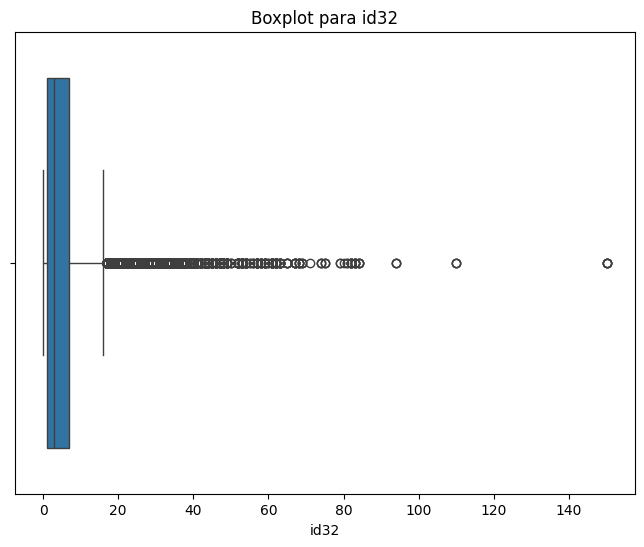

In [1184]:
# Crear un boxplot para la columna 'id21'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id32', data=dataset)
plt.title('Boxplot para id32')
plt.xlabel('id32')
plt.show()

In [1185]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id32'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique No. of accidents.")
else:
    print("All client IDs have unique No. of accidents.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique No. of accidents: {percentage_non_unique:.2f}%")

All client IDs have unique No. of accidents.
Percentage of client IDs with non-unique No. of accidents: 0.00%


id33: Car accidents during the last year

In [1186]:
dataset['id33'].nunique()

35

In [1187]:
dataset['id33'].describe()

count    134067.000000
mean          0.410384
std           1.389971
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          56.000000
Name: id33, dtype: float64

In [1188]:
#To see the percentage of each of the categories
category_counts= dataset['id33'].value_counts()
total_entries = len(dataset['id33'])

category_percentages = (category_counts / total_entries) * 100
print(category_percentages)

id33
0     83.608942
1      7.389589
2      3.847330
3      2.052705
4      1.120335
5      0.610143
6      0.407259
7      0.289408
8      0.157384
9      0.127548
10     0.102188
11     0.062655
12     0.048483
13     0.033565
14     0.029090
15     0.026852
16     0.016410
17     0.014918
22     0.008205
19     0.008205
21     0.006713
18     0.005967
20     0.005967
25     0.004475
23     0.003729
36     0.002984
24     0.002238
29     0.001492
56     0.000746
31     0.000746
33     0.000746
34     0.000746
50     0.000746
47     0.000746
52     0.000746
Name: count, dtype: float64


In [1189]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id33'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique No. of accidents.")
else:
    print("All client IDs have unique No. of accidents.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique No. of accidents: {percentage_non_unique:.2f}%")

Some client IDs have non-unique No. of accidents.
Percentage of client IDs with non-unique No. of accidents: 6.57%


In [1190]:
# Calculate the median accidents associated with each client ID
accidents_median = dataset.groupby('id01')['id33'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, accidents_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['id33'] = dataset['id33_median']

# Drop the columns used for merging
dataset.drop(columns=['id33_median'], inplace=True)

In [1191]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id33'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique No. of accidents.")
else:
    print("All client IDs have unique No. of accidents.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique No. of accidents: {percentage_non_unique:.2f}%")

All client IDs have unique No. of accidents.
Percentage of client IDs with non-unique No. of accidents: 0.00%


id34: That is, the sum of the number of years of each auto policy in force of the client.

In [1192]:
dataset['id34'].nunique()

158

In [1193]:
dataset['id34'].describe()

count    134067.000000
mean         12.322040
std          14.699697
min           0.000000
25%           3.000000
50%           7.000000
75%          17.000000
max         379.000000
Name: id34, dtype: float64

C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


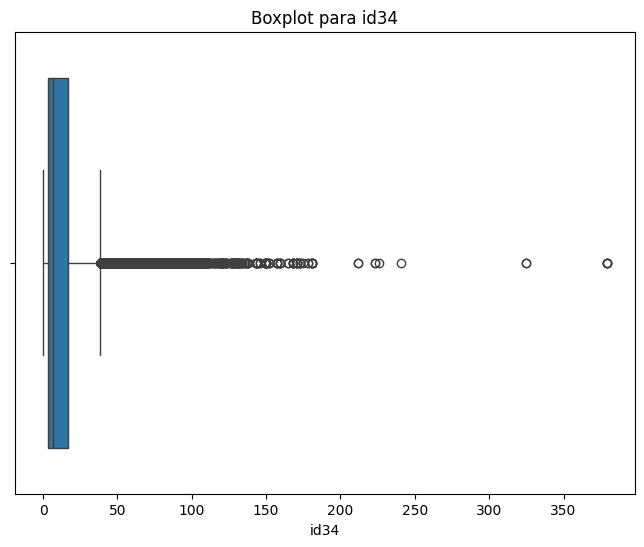

In [1194]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id34', data=dataset)
plt.title('Boxplot para id34')
plt.xlabel('id34')
plt.show()

In [1195]:
#To see the percentage of each of the categories
category_counts= dataset['id34'].value_counts()
total_entries = len(dataset['id34'])

category_percentages = (category_counts / total_entries) * 100
print(category_percentages)

id34
1      9.376655
2      8.307786
3      6.957715
4      6.299835
0      5.532308
5      5.345089
6      4.565628
7      4.227737
8      3.693676
9      3.383383
10     2.997755
11     2.833658
13     2.530824
12     2.415956
14     2.236195
15     2.073590
16     1.888608
17     1.749871
18     1.555938
19     1.442562
20     1.376923
21     1.289654
22     1.206859
23     1.195671
24     1.122573
25     0.958476
26     0.915214
27     0.835403
28     0.772002
29     0.743658
30     0.631028
33     0.583290
31     0.583290
32     0.495275
34     0.487816
35     0.485578
36     0.452759
37     0.430382
38     0.384136
40     0.375931
39     0.369964
42     0.308055
43     0.297612
41     0.296121
46     0.229736
44     0.217056
45     0.215564
48     0.215564
47     0.184982
49     0.179015
51     0.144704
52     0.132024
53     0.131278
56     0.131278
57     0.126056
50     0.122327
61     0.113376
59     0.108901
58     0.108155
55     0.105917
54     0.082794
63     0.080557
62 

In [1196]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id34'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id35: That is, the sum of the number of years of each Miscellaneous/Other policy in force of the client.

In [1197]:
dataset['id35'].nunique()

146

In [1198]:
dataset['id35'].describe()

count    134067.000000
mean          2.998993
std           9.489630
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         280.000000
Name: id35, dtype: float64

C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


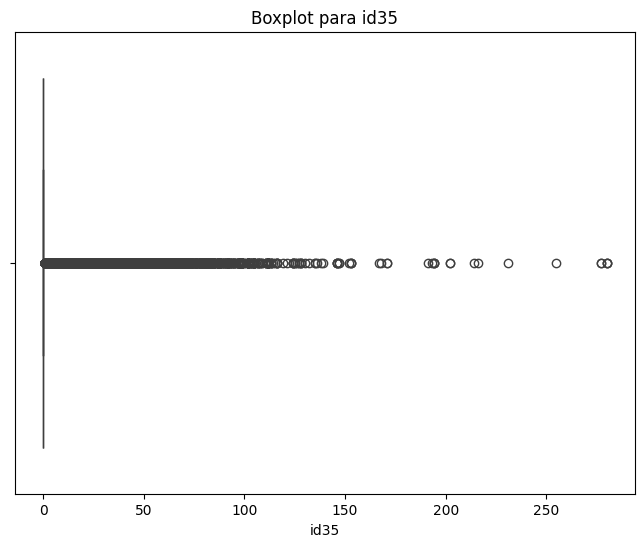

In [1199]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id35', data=dataset)
plt.title('Boxplot para id35')
plt.xlabel('id35')
plt.show()

In [1200]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id35'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1201]:
#To see the percentage of each of the categories
category_counts= dataset['id35'].value_counts()
total_entries = len(dataset['id35'])

category_percentages = (category_counts / total_entries) * 100
print(category_percentages)

id35
0      77.072658
1       2.362252
2       2.051213
3       1.697659
4       1.491046
5       1.392587
6       1.243408
7       1.038287
8       1.030828
9       0.898804
10      0.705617
12      0.628044
11      0.616110
13      0.546742
14      0.516906
15      0.422177
16      0.385628
18      0.342366
17      0.334907
20      0.323719
21      0.320735
23      0.304325
19      0.299104
22      0.285678
24      0.267031
25      0.226752
28      0.202138
26      0.195425
29      0.179761
27      0.173048
30      0.163351
32      0.126056
33      0.125310
31      0.114868
35      0.113376
34      0.104425
38      0.104425
36      0.090253
37      0.078319
39      0.077573
47      0.074590
45      0.071606
42      0.070114
40      0.059672
43      0.058926
41      0.057434
44      0.051467
50      0.044754
49      0.042516
46      0.041024
52      0.040278
51      0.038787
57      0.038787
48      0.038041
56      0.033565
53      0.029836
55      0.026106
58      0.023869
54      0

id36:The variable is extracted through a simple operation of the previous variables: (Number of Car Accidents + Number of Miscellaneous Accidents/Other) / (Period in force Autos + Period in force Miscellaneous/Other).

In [1202]:
dataset['id36'].nunique()

263

In [1203]:
dataset['id36'].describe()

count    134067.000000
mean          0.503723
std           0.615714
min           0.000000
25%           0.130000
50%           0.340000
75%           0.670000
max          14.000000
Name: id36, dtype: float64

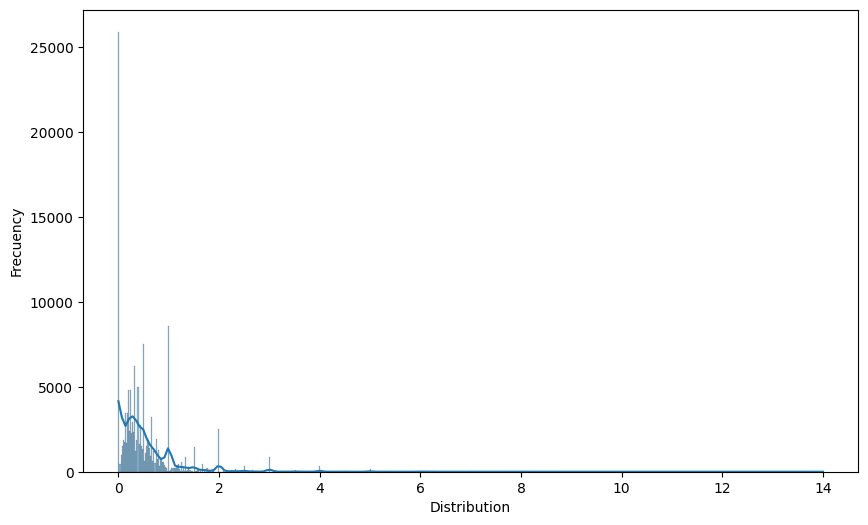

In [1204]:
#Visualization of the distribution of the start dates
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id36', kde=True)
plt.xlabel('Distribution')
plt.ylabel('Frecuency')
plt.show()

C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


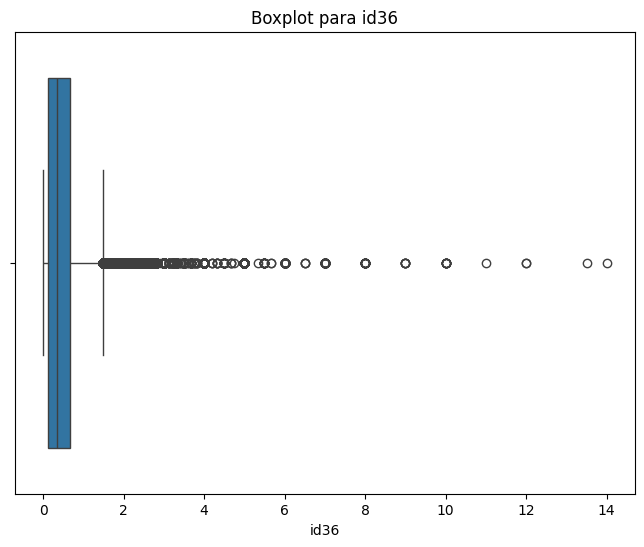

In [1205]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id36', data=dataset)
plt.title('Boxplot para id36')
plt.xlabel('id36')
plt.show()

In [1206]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id36'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id37: Frequency of client's historical auto accidents.

In [1207]:
dataset['id37'].nunique()

264

In [1208]:
dataset['id37'].describe()

count    134067.000000
mean          0.510346
std           0.627351
min           0.000000
25%           0.110000
50%           0.340000
75%           0.670000
max          14.000000
Name: id37, dtype: float64

In [1209]:
#To see the percentage of each of the categories
category_counts= dataset['id37'].value_counts()
total_entries = len(dataset['id37'])

category_percentages = (category_counts / total_entries) * 100
print(category_percentages)

id37
0.00     20.715762
1.00      6.768258
0.50      5.717291
0.33      4.079304
0.25      2.853797
0.67      2.456980
0.20      2.133262
2.00      1.963198
0.40      1.724511
0.17      1.646938
0.29      1.593979
0.75      1.406759
0.38      1.361260
0.14      1.290400
0.13      1.265039
0.60      1.239679
0.43      1.182245
1.50      1.177023
0.27      0.922673
0.22      0.889854
0.44      0.873444
0.36      0.870460
0.11      0.856288
0.18      0.848829
0.57      0.817502
0.21      0.804821
0.31      0.788412
0.80      0.779461
0.10      0.776477
0.30      0.766035
0.23      0.689954
3.00      0.673544
0.63      0.668323
0.15      0.666085
1.33      0.664593
0.08      0.659372
0.42      0.633265
0.56      0.619093
0.24      0.615364
0.71      0.613126
0.45      0.555692
0.35      0.549725
0.26      0.540774
0.09      0.538537
0.19      0.532570
0.83      0.529586
0.32      0.520635
0.47      0.516160
0.07      0.500496
0.64      0.475881
0.41      0.471406
0.46      0.468423
1.25   

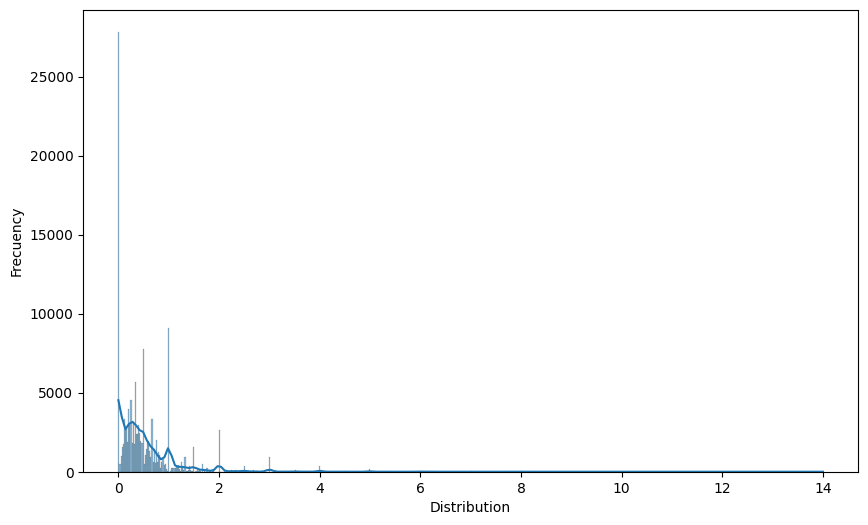

In [1210]:
#Visualization of the distribution of the start dates
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id37', kde=True)
plt.xlabel('Distribution')
plt.ylabel('Frecuency')
plt.show()

C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


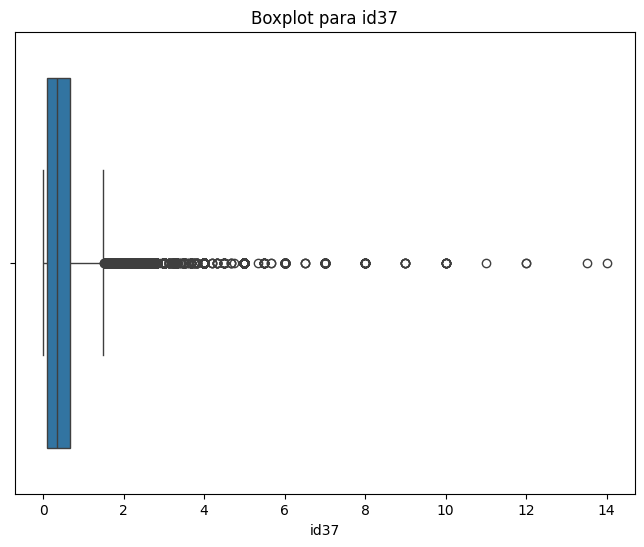

In [1211]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id37', data=dataset)
plt.title('Boxplot para id37')
plt.xlabel('id37')
plt.show()

In [1212]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id37'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id38: The variable is extracted through a simple operation from the previous variables (ID30/ID35).

In [1213]:
dataset['id38'].nunique()

172

In [1214]:
dataset['id38'].describe()

count    134067.000000
mean          0.078311
std           0.256549
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: id38, dtype: float64

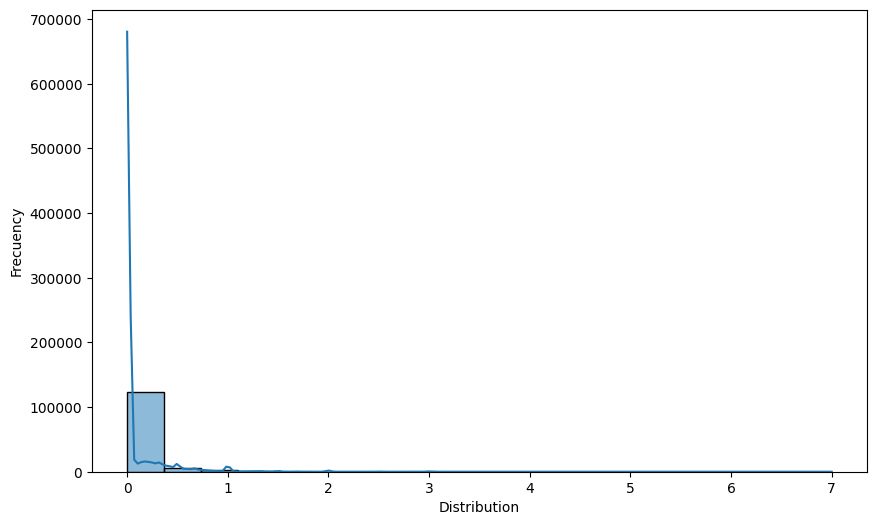

In [1215]:
#Visualization of the distribution of the start dates
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id38', kde=True)
plt.xlabel('Distribution')
plt.ylabel('Frecuency')
plt.show()

In [1216]:
#To see the percentage of each of the categories
category_counts= dataset['id38'].value_counts()
total_entries = len(dataset['id38'])

category_percentages = (category_counts / total_entries) * 100
print(category_percentages)

id38
0.00    83.461254
0.50     1.268769
1.00     1.153901
0.33     1.012926
0.25     0.740674
0.17     0.587020
0.20     0.563897
0.67     0.473644
0.29     0.438587
0.40     0.431128
0.14     0.421431
0.13     0.420685
0.11     0.315514
0.38     0.293883
0.18     0.290899
0.22     0.275981
0.10     0.260318
0.43     0.234211
0.08     0.224515
0.75     0.221531
0.60     0.218547
2.00     0.218547
0.09     0.217056
0.21     0.217056
0.23     0.211834
0.27     0.208851
0.15     0.205867
0.30     0.205867
0.07     0.179015
0.31     0.179015
0.36     0.179015
0.19     0.167081
0.44     0.165589
0.24     0.154400
0.57     0.146941
1.50     0.141720
0.06     0.137991
0.16     0.129786
0.42     0.120835
0.05     0.119343
0.12     0.117852
0.80     0.111138
0.35     0.110393
0.56     0.109647
0.28     0.108155
0.26     0.105917
0.63     0.104425
0.71     0.103680
0.45     0.102934
0.32     0.102934
0.04     0.099950
1.33     0.095475
0.41     0.085778
0.47     0.080557
0.46     0.076081
0.39 

C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


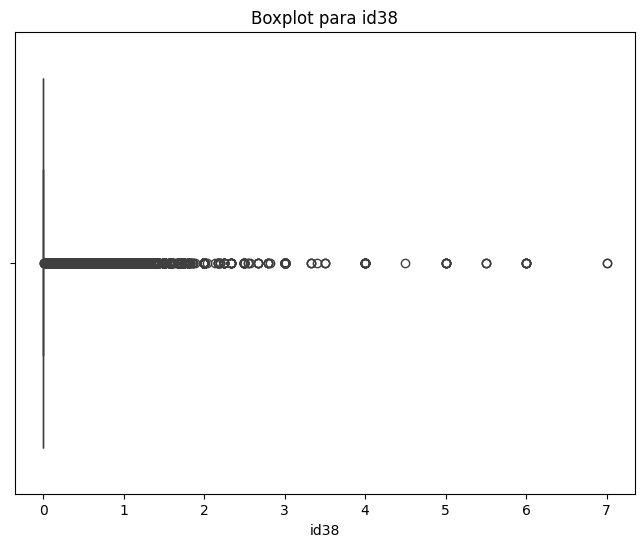

In [1217]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id38', data=dataset)
plt.title('Boxplot para id38')
plt.xlabel('id38')
plt.show()

In [1218]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id38'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id39: Historical frequency of claims for the policy in question.

In [1219]:
dataset['id39'].nunique()

662

In [1220]:
dataset['id39'].describe()

count    134067.000000
mean          0.528377
std           1.089285
min           0.000000
25%           0.000000
50%           0.250000
75%           0.670000
max          91.250000
Name: id39, dtype: float64

In [1221]:
#To see the percentage of each of the categories
category_counts= dataset['id39'].value_counts()
total_entries = len(dataset['id39'])

category_percentages = (category_counts / total_entries) * 100
print(category_percentages)

id39
0.00     39.723422
1.00      5.551702
0.50      3.562398
0.33      2.241417
2.00      1.858026
0.67      1.673044
0.25      1.591741
0.40      1.175532
0.20      1.146442
1.50      0.912976
0.17      0.909247
0.29      0.813772
0.75      0.708601
0.14      0.704871
0.22      0.686970
3.00      0.616856
0.21      0.601192
0.60      0.600446
1.33      0.579561
0.27      0.575831
0.18      0.571356
0.43      0.566135
0.37      0.552709
0.12      0.539283
0.36      0.537045
0.24      0.525111
0.30      0.523619
0.80      0.509447
0.23      0.501242
0.19      0.499750
0.57      0.494529
0.44      0.493783
0.15      0.479611
0.35      0.467677
0.28      0.465439
0.31      0.454250
0.13      0.453505
0.11      0.452759
0.16      0.445300
0.38      0.438587
0.26      0.424415
0.34      0.422177
0.41      0.413226
0.32      0.409497
0.10      0.392341
1.99      0.386374
0.45      0.385628
0.42      0.385628
0.39      0.363997
0.47      0.360268
0.46      0.357284
0.62      0.333415
0.54   

C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


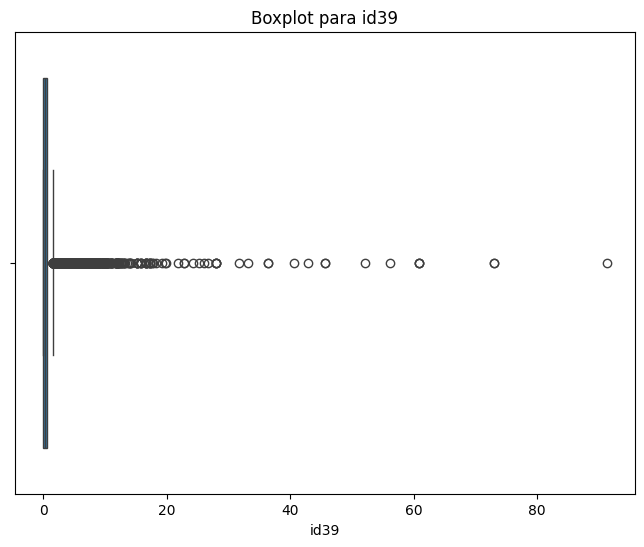

In [1222]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id39', data=dataset)
plt.title('Boxplot para id39')
plt.xlabel('id39')
plt.show()

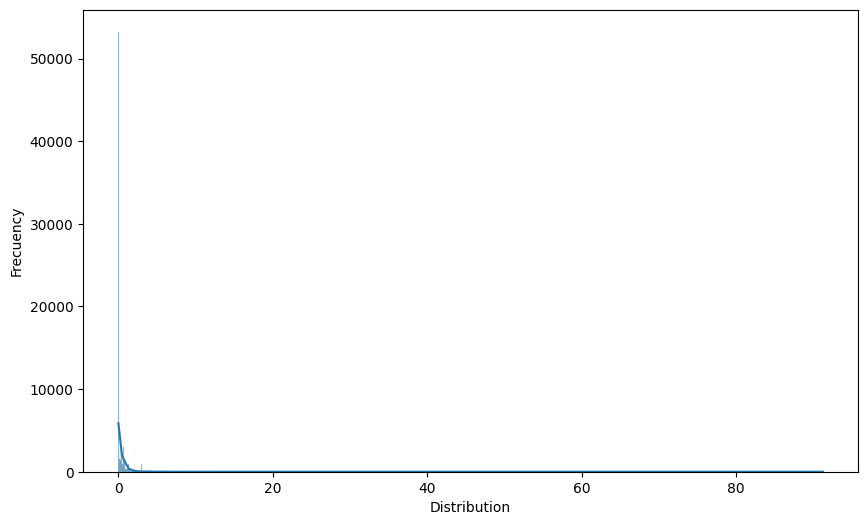

In [1223]:
#Visualization of the distribution of the start dates
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id39', kde=True)
plt.xlabel('Distribution')
plt.ylabel('Frecuency')
plt.show()

In [1224]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id39'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 20.83%


In [1225]:
# Calculate the median accidents associated with each client ID
id39_median = dataset.groupby('id01')['id39'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, id39_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['id39'] = dataset['id39_median']

# Drop the columns used for merging
dataset.drop(columns=['id39_median'], inplace=True)

In [1226]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id39'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id40: Number of variation of the policy in question during the current year.

In [1227]:
dataset['id40'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

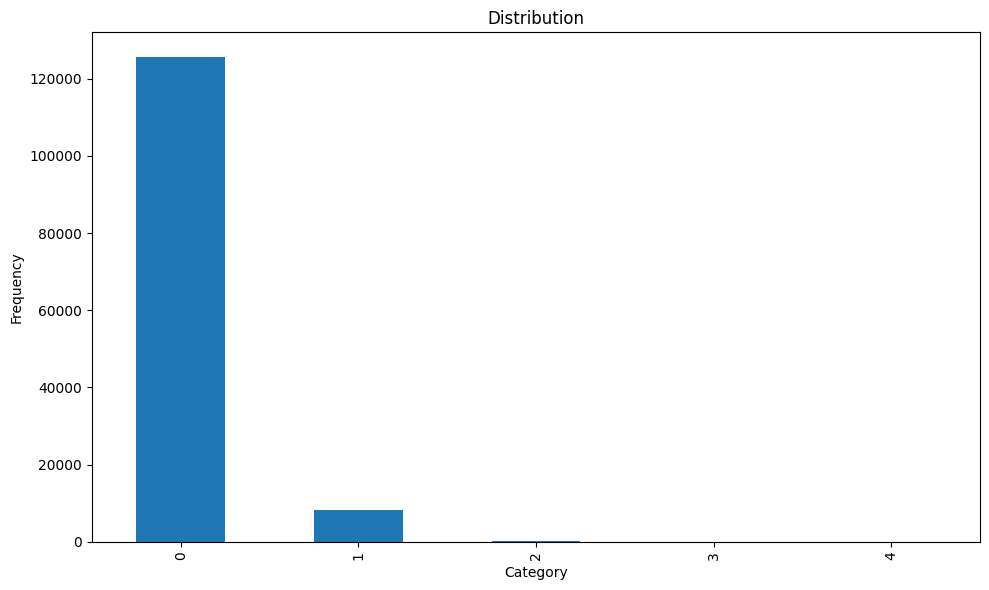

In [1228]:
# Obtener la frecuencia de cada categoría en 'id11'
categorias = dataset['id40'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
categorias.plot(kind='bar')
plt.title('Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [1229]:
#To see the percentage of each of the categories
category_counts= dataset['id40'].value_counts()
total_entries = len(dataset['id40'])

category_percentages = (category_counts / total_entries) * 100
print(category_percentages)

id40
0    93.776246
1     6.121566
2     0.097712
3     0.003729
4     0.000746
Name: count, dtype: float64


In [1230]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id40'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 3.18%


In [1231]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'id40'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_id40 = dataset.groupby('id01')['id40'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_id40, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['id40'] = dataset['id40_last']

# Drop the columns used for merging
dataset.drop(columns=['id40_last'], inplace=True)

In [1232]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id40'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id41: Client's historical net premiums includes both current and canceled policies.

In [1233]:
dataset['id41'].nunique()

90065

In [1234]:
dataset['id41'].describe()

count    134067.000000
mean       4744.194499
std        5843.644905
min        -202.440000
25%        1104.900000
50%        2765.500000
75%        6289.200000
max      131746.160000
Name: id41, dtype: float64

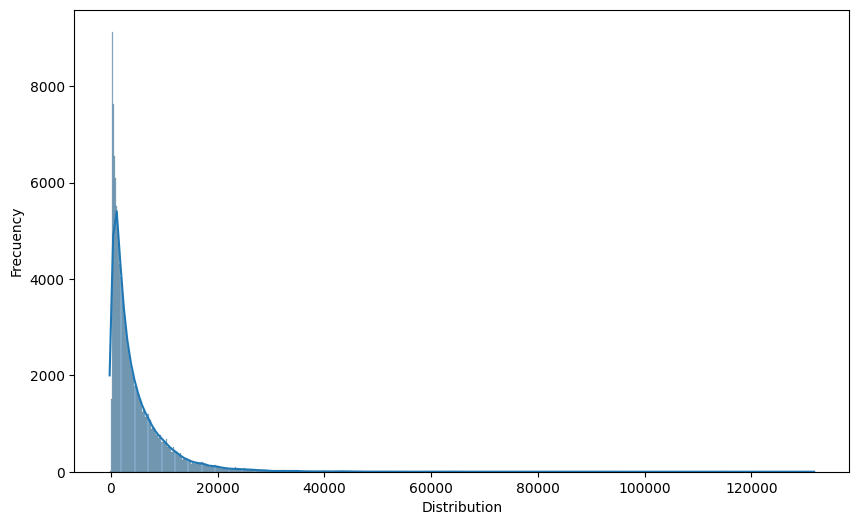

In [1235]:
#Visualization of the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id41', kde=True)
plt.xlabel('Distribution')
plt.ylabel('Frecuency')
plt.show()

C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


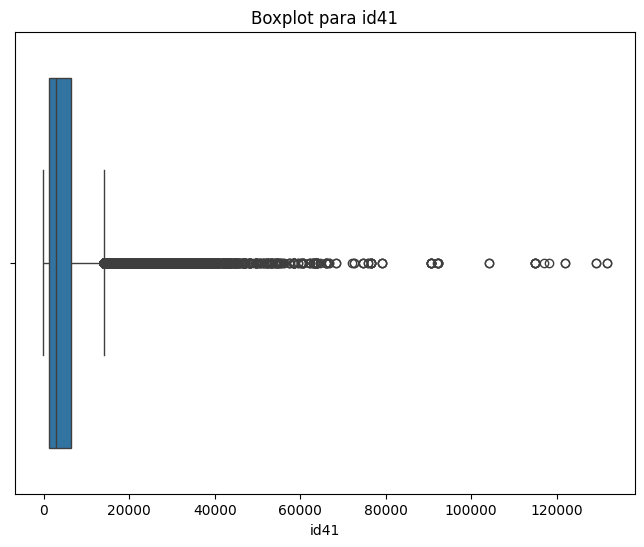

In [1236]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id41', data=dataset)
plt.title('Boxplot para id41')
plt.xlabel('id41')
plt.show()

In [1237]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id41'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id42: Historical client commissions.

In [1238]:
dataset['id42'].nunique()

61110

In [1239]:
dataset['id42'].describe()

count    134067.000000
mean        664.357223
std         911.709829
min        -266.420000
25%         134.700000
50%         354.330000
75%         845.725000
max       23533.610000
Name: id42, dtype: float64

In [1240]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id42'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


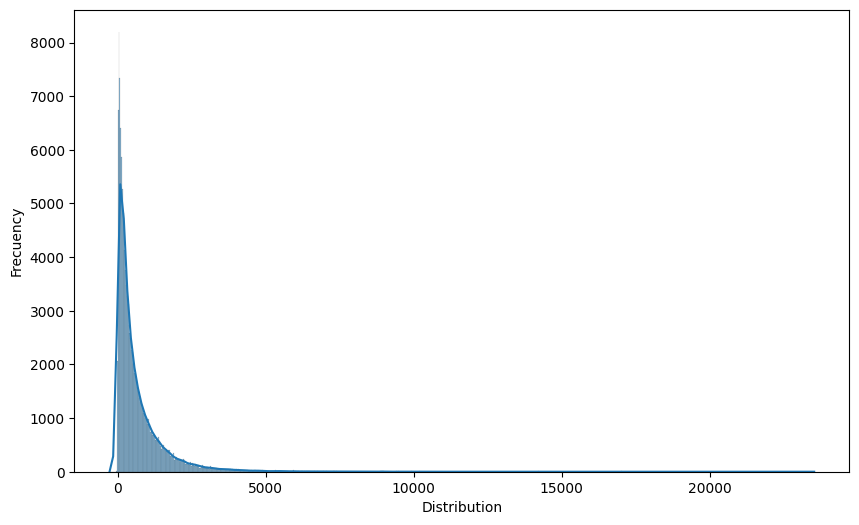

In [1241]:
#Visualization of the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id42', kde=True)
plt.xlabel('Distribution')
plt.ylabel('Frecuency')
plt.show()

C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


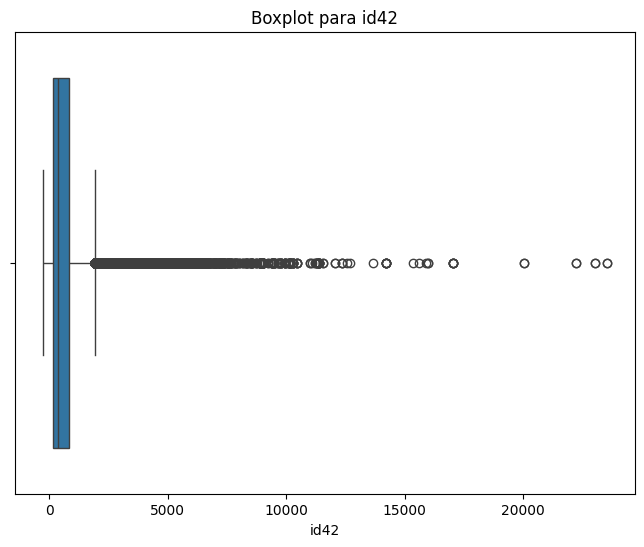

In [1242]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id42', data=dataset)
plt.title('Boxplot para id42')
plt.xlabel('id42')
plt.show()

id43: Historical cost of all the claims that the client has had both current and canceled policies.

In [1243]:
dataset['id43'].nunique()

63340

In [1244]:
dataset['id43'].describe()

count    1.340670e+05
mean     2.619142e+03
std      1.194133e+04
min     -6.318520e+03
25%      0.000000e+00
50%      7.376100e+02
75%      2.612560e+03
max      1.784366e+06
Name: id43, dtype: float64

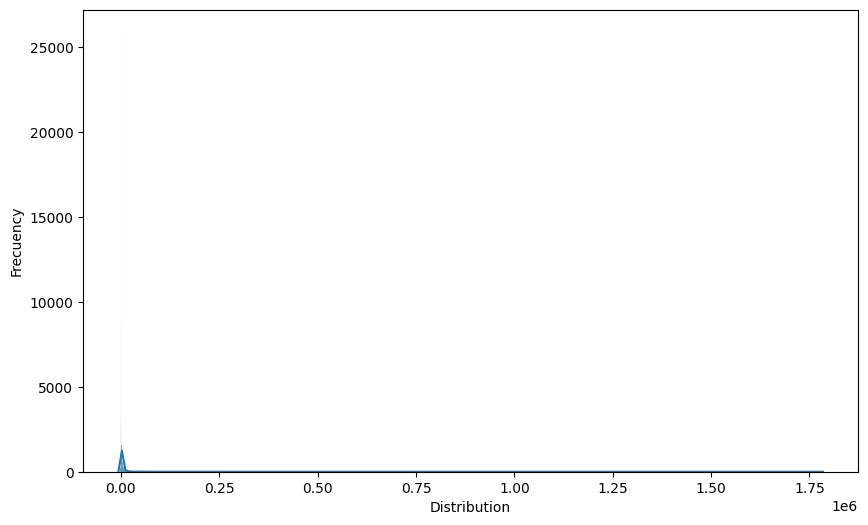

In [1245]:
#Visualization of the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id43', kde=True)
plt.xlabel('Distribution')
plt.ylabel('Frecuency')
plt.show()

In [1246]:
#To see the percentage of each of the categories
category_counts= dataset['id43'].value_counts()
total_entries = len(dataset['id43'])

category_percentages = (category_counts / total_entries) * 100
print(category_percentages)

id43
 0.00          18.460919
 882.00         0.930132
 51.95          0.385628
 1012.00        0.328940
 907.00         0.246891
 49.95          0.223769
 150.25         0.185728
 67.11          0.143212
 1764.00        0.110393
 53.39          0.072352
 64.32          0.068622
 51.57          0.064147
 14.04          0.062655
 933.95         0.055196
 52.09          0.049229
 53.76          0.047737
-882.00         0.046991
 103.90         0.043262
 56.85          0.043262
 119.06         0.038787
 50.09          0.038041
 53.53          0.037295
 55.50          0.034311
 53.63          0.034311
 55.67          0.033565
 69.13          0.030582
 60.62          0.030582
 931.95         0.029836
 53.59          0.029836
 1913.46        0.029090
 14.18          0.028344
 55.54          0.024615
 66.59          0.024615
 49.13          0.024615
 741.00         0.023123
 62.43          0.023123
 67.25          0.023123
 1789.00        0.020885
 51.71          0.020885
 85.01          0.02

In [1247]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id43'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id44: Net premiums from the client's last 5 years.

In [1248]:
dataset['id44'].nunique()

74052

In [1249]:
dataset['id44'].describe()

count    134067.000000
mean       1791.122488
std        1844.193582
min        -714.710000
25%         508.860000
50%        1300.100000
75%        2467.890000
max       25259.160000
Name: id44, dtype: float64

In [1250]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id44'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


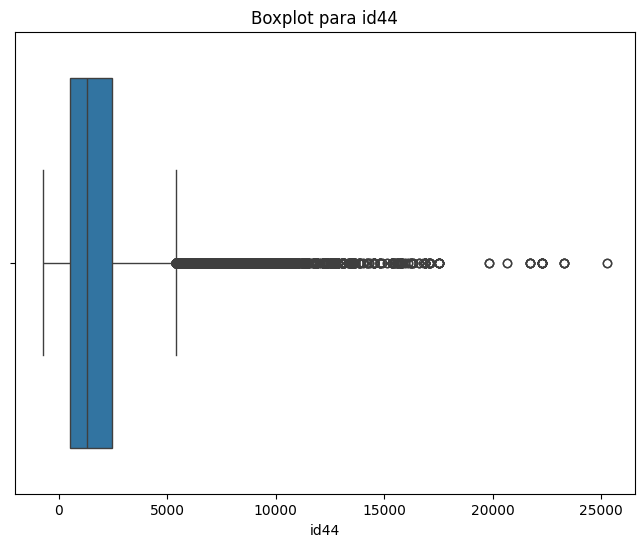

In [1251]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id44', data=dataset)
plt.title('Boxplot para id44')
plt.xlabel('id44')
plt.show()

id45: Commissions from the client's last 5 years.

In [1252]:
dataset['id45'].describe()

count    134067.000000
mean        249.853886
std         282.699302
min        -160.520000
25%          58.050000
50%         167.680000
75%         343.205000
max        3960.200000
Name: id45, dtype: float64

C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


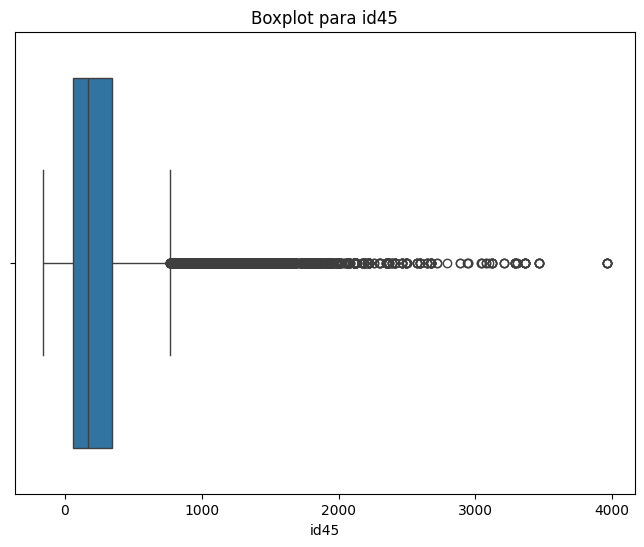

In [1253]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id45', data=dataset)
plt.title('Boxplot para id45')
plt.xlabel('id45')
plt.show()

In [1254]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id45'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id46: Cost of all claims from the client's last 5 years.

In [1255]:
dataset['id46'].nunique()

43958

In [1256]:
dataset['id46'].describe()

count    134067.000000
mean       1233.921490
std        8663.887846
min       -4032.360000
25%           0.000000
50%         123.080000
75%        1048.380000
max      704991.440000
Name: id46, dtype: float64

In [1257]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id46'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id47: Net premiums from the client's last 3 years.

In [1258]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id47'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1259]:
dataset['id47'].describe()

count    134067.000000
mean       1089.577443
std        1184.119800
min        -815.580000
25%         228.290000
50%         800.490000
75%        1556.550000
max       15585.890000
Name: id47, dtype: float64

In [1260]:
dataset['id47'].nunique()

60905

id48: Commissions from the client's last 3 years.

In [1261]:
dataset['id48'].unique()

array([ 37.67,  88.42,  91.71, ..., 342.37, 167.33, 661.42])

In [1262]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id48'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1263]:
dataset['id48'].describe()

count    134067.000000
mean        152.663116
std         180.642357
min         -97.680000
25%          21.785000
50%         103.680000
75%         217.695000
max        2424.430000
Name: id48, dtype: float64

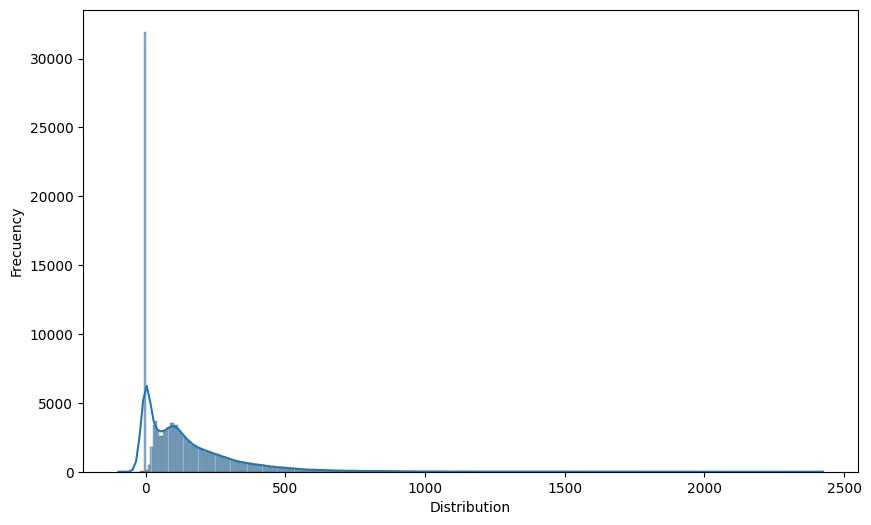

In [1264]:
#Visualization of the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id48', kde=True)
plt.xlabel('Distribution')
plt.ylabel('Frecuency')
plt.show()

C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


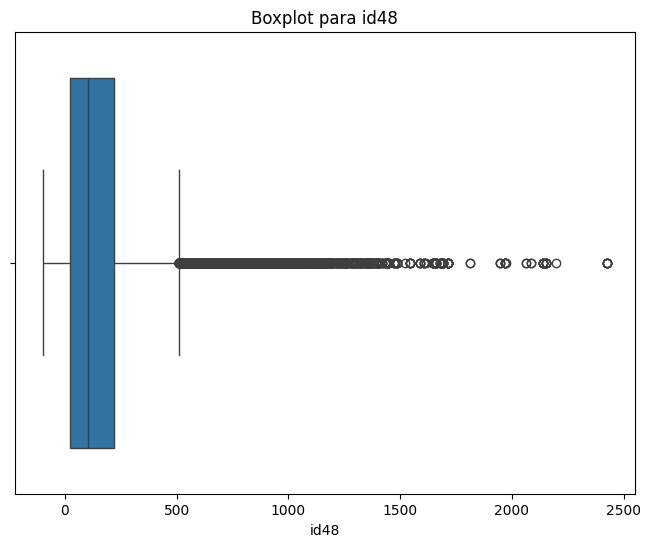

In [1265]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id48', data=dataset)
plt.title('Boxplot para id48')
plt.xlabel('id48')
plt.show()

id49: Cost of all claims from the client's last 3 years.

In [1266]:
dataset['id49'].unique()

array([   0.  ,   49.75,  112.89, ..., 2262.82, 3888.59, -390.8 ])

In [1267]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id49'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


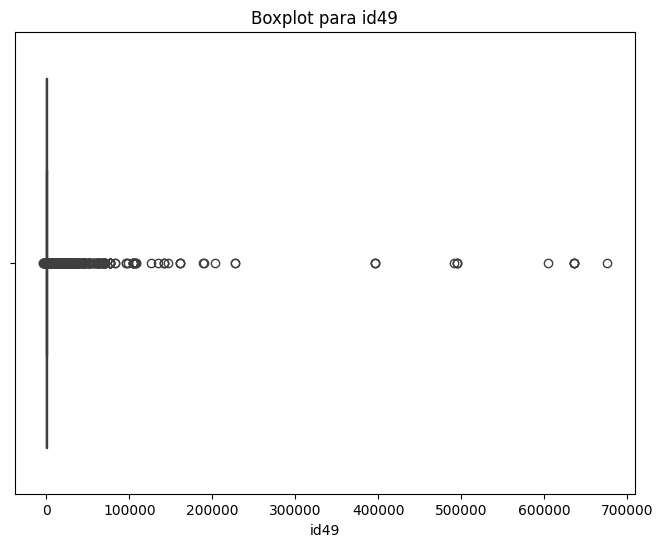

In [1268]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id49', data=dataset)
plt.title('Boxplot para id49')
plt.xlabel('id49')
plt.show()

id50: Net premium of the reference policy during the current year.

In [1269]:
dataset['id50'].unique()

array([354.44, 338.67, 293.1 , ...,  52.68, 629.8 , 509.88])

In [1270]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id50'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 24.64%


C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


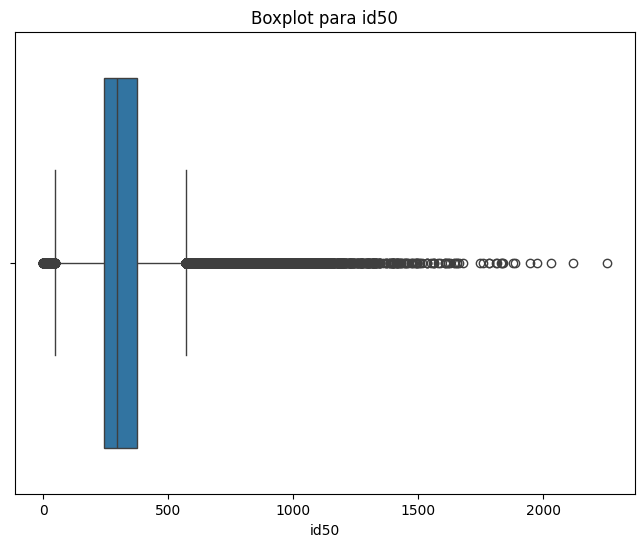

In [1271]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id50', data=dataset)
plt.title('Boxplot para id50')
plt.xlabel('id50')
plt.show()

In [1272]:
dataset['id50'].describe()

count    134067.000000
mean        328.658369
std         136.568403
min           0.010000
25%         243.670000
50%         294.490000
75%         374.090000
max        2253.030000
Name: id50, dtype: float64

In [1273]:
# Calculate the median accidents associated with each client ID
id50_median = dataset.groupby('id01')['id50'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, id50_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['id50'] = dataset['id50_median']

# Drop the columns used for merging
dataset.drop(columns=['id50_median'], inplace=True)

In [1274]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id50'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id51: Commissions of the reference policy during the current year.

In [1275]:
dataset['id51'].unique()

array([38.98, 46.06, 44.96, ..., 94.3 , 91.6 ,  7.12])

In [1276]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id51'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 23.97%


C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


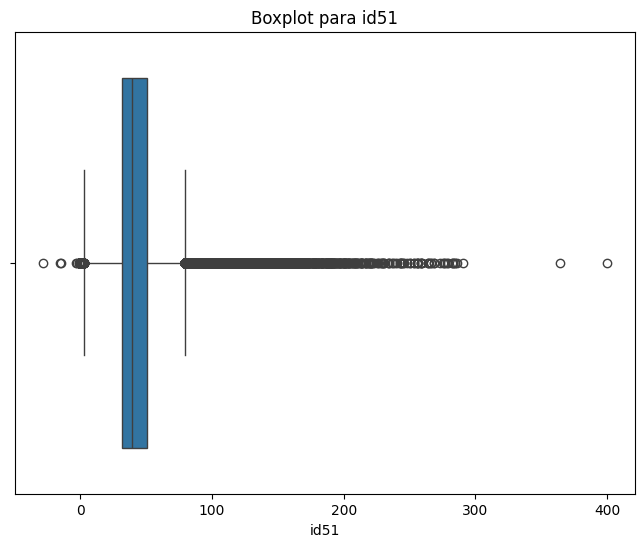

In [1277]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id51', data=dataset)
plt.title('Boxplot para id51')
plt.xlabel('id51')
plt.show()

In [1278]:
# Calculate the median accidents associated with each client ID
id51_median = dataset.groupby('id01')['id51'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, id51_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['id51'] = dataset['id51_median']

# Drop the columns used for merging
dataset.drop(columns=['id51_median'], inplace=True)

In [1279]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id51'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id52: Cost of claims of the reference policy during the current year.

In [1280]:
dataset['id52'].unique()

array([    0.  ,   261.85,    85.04, ...,   111.42,  1082.08, -1472.88])

In [1281]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id52'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 9.41%


C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


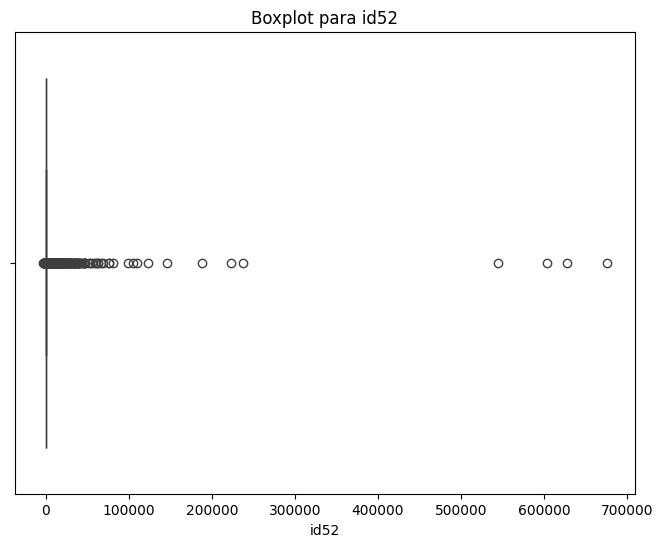

In [1282]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id52', data=dataset)
plt.title('Boxplot para id52')
plt.xlabel('id52')
plt.show()

In [1283]:
# Calculate the median accidents associated with each client ID
id52_median = dataset.groupby('id01')['id52'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, id52_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['id52'] = dataset['id52_median']

# Drop the columns used for merging
dataset.drop(columns=['id52_median'], inplace=True)

In [1284]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id52'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id53: No. Policies canceled by the company throughout the client's life.

In [1285]:
dataset['id53'].unique()

array([ 0,  1,  3,  2,  4,  5,  6,  8, 10, 11,  7, 16, 13,  9],
      dtype=int64)

In [1286]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id53'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


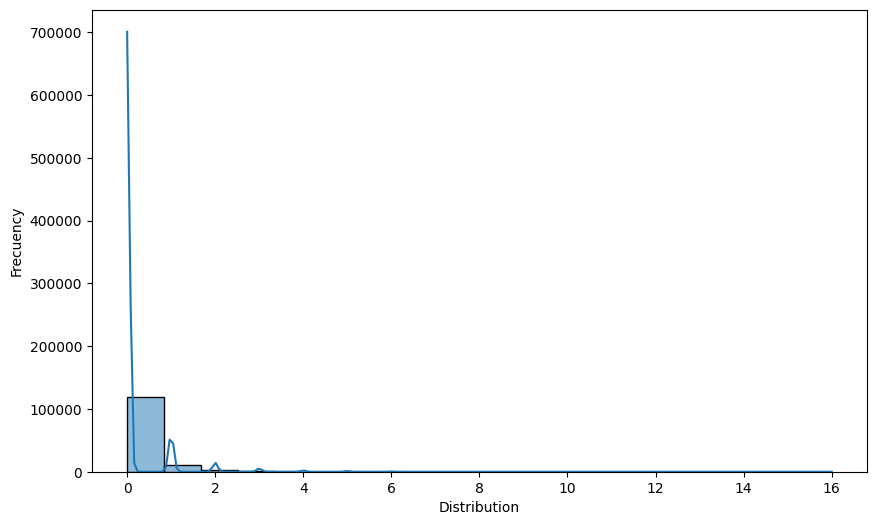

In [1287]:
#Visualization of the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id53', kde=True)
plt.xlabel('Distribution')
plt.ylabel('Frecuency')
plt.show()

id54: Final payment method of the reference policy.

In [1288]:
dataset['id54'].unique()

array(['ANUAL DOMICILIADO', 'SEMESTRAL DOMICILIADO', 'ANUAL EFECTIVO',
       'SEMESTRAL 1ER PAGO EFECTI', 'SEMESTRAL EFECTIVO'], dtype=object)

In [1289]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id54'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 10.34%


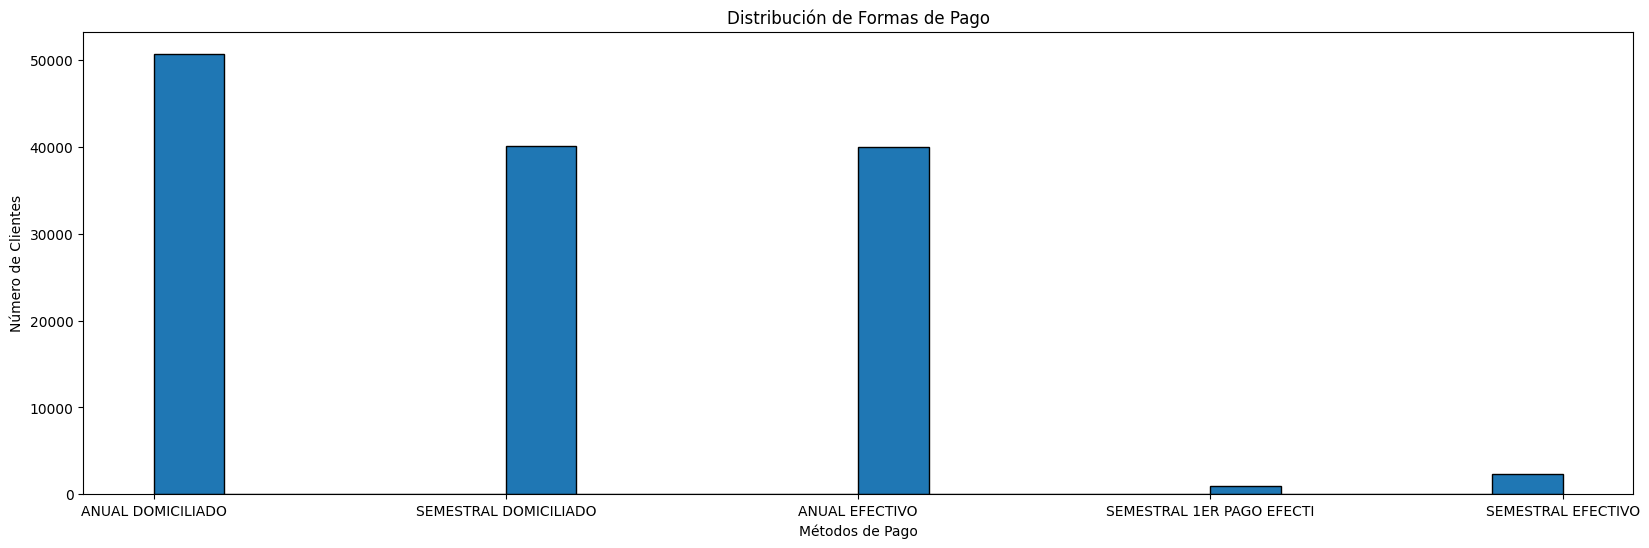

In [1290]:
# Configurar el tamaño de la figura
plt.figure(figsize=(20, 6))

# Crear el histograma de la variable 'id54' (FormaPago)
plt.hist(dataset['id54'], bins=20, edgecolor='k')

# Configurar etiquetas del eje x y del eje y
plt.xlabel('Métodos de Pago')  # Etiqueta del eje x
plt.ylabel('Número de Clientes')  # Etiqueta del eje y

# Configurar el título del gráfico
plt.title('Distribución de Formas de Pago')  # Título del gráfico

# Mostrar el gráfico
plt.show()


In [1291]:
print(dataset['id54'].value_counts())

id54
ANUAL DOMICILIADO            50683
SEMESTRAL DOMICILIADO        40157
ANUAL EFECTIVO               40005
SEMESTRAL EFECTIVO            2281
SEMESTRAL 1ER PAGO EFECTI      941
Name: count, dtype: int64


In [1292]:
# Define the mappings for the new variables
when_to_pay_mapping = {
    'ANUAL DOMICILIADO': 'ANUAL DOMICILIADO',
    'SEMESTRAL DOMICILIADO': 'SEMESTRAL DOMICILIADO'
}

how_to_pay_mapping = {
    'ANUAL DOMICILIADO': 'ANUAL DOMICILIADO',
    'ANUAL EFECTIVO': 'ANUAL EFECTIVO',
}

# Create the new variables
dataset['when_to_pay'] = dataset['id54'].map(when_to_pay_mapping)
dataset['how_to_pay'] = dataset['id54'].map(how_to_pay_mapping)

In [1293]:
dataset.head()

id01  id02    id04           id05  \
0  00007f74a316bd9b4d567871e6efd507dbb4d23c     2  911906  JULIAN MANUEL   
1  000135522179f0a0b1d18975f7619facbfd66e48     2  919353          TANIA   
2  00016278627cd9e80ea8206620ae433bef0946b5     2  923173           SARA   
3  0001a5af481ef269ec8147319f5b412ab75fa6cf     2  870296          SONIA   
4  0001a5af481ef269ec8147319f5b412ab75fa6cf     2  797343          SONIA   

        id06       id08     id09_x id11_original id13_original id14_original  \
0 2021-10-08 2023-10-08 2022-10-08            BB             I      PROYECTA   
1 2022-02-22 2024-02-22        NaT            BB             F      PROYECTA   
2 2022-03-29 2023-03-29        NaT            NN             D       EXPANDE   
3 2020-03-06 2022-03-06 2021-03-06             B             B        OPTIMA   
4 2017-10-05 2023-10-05        NaT             B             E        OPTIMA   

      id15_original  id16  id17_original  id18_original                 id20  \
0        CORREDORES   2.0            180             73  2002-12-15 00:00:00   
1  AGTES.EXCLUSIVOS   3.0            300             40  2014-06-17 00:00:00   
2        CORREDORES   2.0             36            200  2017-11-23 00:00:00   
3        CORREDORES   7.0             20             51  2007-04-10 00:00:00   
4        CORREDORES   7.0             20             51  2007-04-10 00:00:00   

      id21   id24  id25_original  id26  id27  id28  id29_original  id30  \
0  41339.0  Rural            1.0     1     0     1              1     0   
1  30151.0  Rural            1.0     1     1     1              0     0   
2   3830.0  Rural            1.0     1     1     1              0     0   
3  13300.0  Rural            3.0     4     1     1              2     0   
4  13300.0  Rural            2.0     4     1     1              0     0   

   id31_original  id32  id33_original  id34  id35  id36  id37  id38  \
0              0     0              0     1     0  0.00  0.00   0.0   
1              0     1              0     2     0  0.50  0.50   0.0   
2              0     0              0     1     0  0.00  0.00   0.0   
3              0    10              0    12     0  0.83  0.83   0.0   
4              0    10              0    12     0  0.83  0.83   0.0   

   id39_original  id40_original     id41    id42    id43     id44    id45  \
0           0.00              0   342.44   37.67    0.00   342.44   37.67   
1           0.49              0   997.41  135.60   49.75   651.64   88.42   
2           0.00              0   921.34  141.32    0.00   597.92   91.71   
3           1.00              0  3105.67  407.10  722.04  2259.54  297.23   
4           0.31              0  3105.67  407.10  722.04  2259.54  297.23   

      id46     id47    id48    id49  id50_original  id51_original  \
0     0.00   342.44   37.67    0.00         354.44          38.98   
1    49.75   651.64   88.42   49.75         338.67          46.06   
2     0.00   597.92   91.71    0.00         293.10          44.96   
3  1009.58  1427.89  188.30  112.89         195.94          25.81   
4  1009.58  1427.89  188.30  112.89         218.29          28.54   

   id52_original  id53                   id54  id55  id57  id58_1  id58_2  \
0           0.00     0      ANUAL DOMICILIADO -40.0     4     NaN     NaN   
1           0.00     0  SEMESTRAL DOMICILIADO -50.0     1     NaN     2.0   
2           0.00     0      ANUAL DOMICILIADO -50.0     0     NaN     NaN   
3           0.00     0  SEMESTRAL DOMICILIADO -50.0     0     1.0     NaN   
4         261.85     0  SEMESTRAL DOMICILIADO -50.0     0     1.0     NaN   

   id58_3      id59     id60     id61   id70  id71 id72  SINCOTotalVehiculos  \
0     NaN      0.00     0.00     0.00  130.0   4.0    D                  2.0   
1     NaN  10744.18  1478.74  3036.22   90.0   5.0    D                  0.0   
2     NaN      0.00     0.00     0.00   95.0   5.0    G                  1.0   
3     NaN      0.00     0.00     0.00   90.0   5.0    G                  0.0   
4

In [1294]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['how_to_pay'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 3.47%


In [1295]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'how_to_pay'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_how_to_pay = dataset.groupby('id01')['how_to_pay'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_how_to_pay, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['how_to_pay'] = dataset['how_to_pay_last']

# Drop the columns used for merging
dataset.drop(columns=['how_to_pay_last'], inplace=True)

In [1296]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['when_to_pay'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 3.72%


In [1297]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'when_to_pay'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_when_to_pay = dataset.groupby('id01')['when_to_pay'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_when_to_pay, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['when_to_pay'] = dataset['when_to_pay_last']

# Drop the columns used for merging
dataset.drop(columns=['when_to_pay_last'], inplace=True)

id55: Bonus that the client has in the reference period in the event that they have contracted an auto policy.

In [1298]:
dataset['id55'].nunique()

22

In [1299]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id55'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 8.09%


In [1300]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'id55'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_id55 = dataset.groupby('id01')['id55'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_id55, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['id55'] = dataset['id55_last']

# Drop the columns used for merging
dataset.drop(columns=['id55_last'], inplace=True)

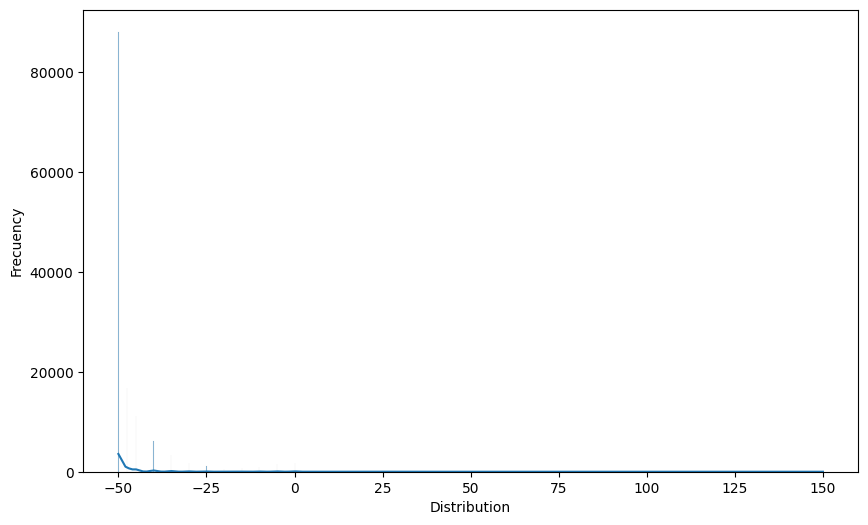

In [1301]:
#Visualization of the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id55', kde=True)
plt.xlabel('Distribution')
plt.ylabel('Frecuency')
plt.show()

In [1302]:
print(dataset['id55'].value_counts())

id55
-50.0     88001
-47.5     16667
-45.0     11095
-40.0      6140
-35.0      3250
 0.0       1738
-30.0      1692
-5.0       1582
-25.0      1096
-10.0       982
-15.0       695
-20.0       548
 25.0       194
 5.0        189
 20.0       104
 10.0        54
 50.0        18
 15.0        10
 150.0        5
 75.0         5
 100.0        2
Name: count, dtype: int64


id57: Number of historical commercial actions (cross-selling,…) of the client.

In [1303]:
dataset['id57'].nunique()

67

In [1304]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id57'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1305]:
print(dataset['id57'].value_counts())

id57
0      33546
1      27333
2      20034
3      14497
4       9383
5       6728
6       4887
7       3509
8       2787
9       2392
10      1634
11      1331
12      1094
13       891
14       617
15       538
16       456
19       323
17       313
18       291
20       211
21       151
22       113
23       102
24        90
27        83
28        73
26        68
25        59
32        47
30        44
29        44
31        38
33        38
37        31
34        26
35        24
38        23
39        19
41        18
43        16
36        14
58        14
47        13
40        12
54        11
70        11
59        10
52         9
42         9
44         9
53         7
50         6
51         5
48         5
60         4
64         4
95         3
49         3
76         3
72         3
57         3
99         2
45         2
46         1
109        1
63         1
Name: count, dtype: int64


id58-1: Links with the client. (SPOUSE (1ST DEGREE))

In [1306]:
dataset['id58_1'].nunique()

15

In [1307]:
print(dataset['id58_1'].value_counts())

id58_1
1.0     37545
2.0      1739
3.0       185
4.0        15
5.0         8
10.0        5
45.0        4
53.0        2
11.0        2
76.0        1
8.0         1
19.0        1
6.0         1
47.0        1
9.0         1
Name: count, dtype: int64


In [1308]:
dataset['id58_1'].fillna(0, inplace=True)

C:\Users\EGHORB~1\AppData\Local\Temp/ipykernel_17604/3826272661.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['id58_1'].fillna(0, inplace=True)


In [1309]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id58_1'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id58_2: links with the client. CHILD AND FATHER (1ST GRADE).

In [1310]:
dataset['id58_2'].unique()

array([nan,  2.,  1.,  3.,  4.,  5.,  9.,  7.,  6., 25., 27.,  8., 20.,
       46., 32., 45., 53., 15., 13., 12., 44., 10., 28., 26., 29., 47.,
       36., 31., 11.])

In [1311]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id58_2'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1312]:
dataset['id58_2'] = dataset['id58_2'].fillna(0)

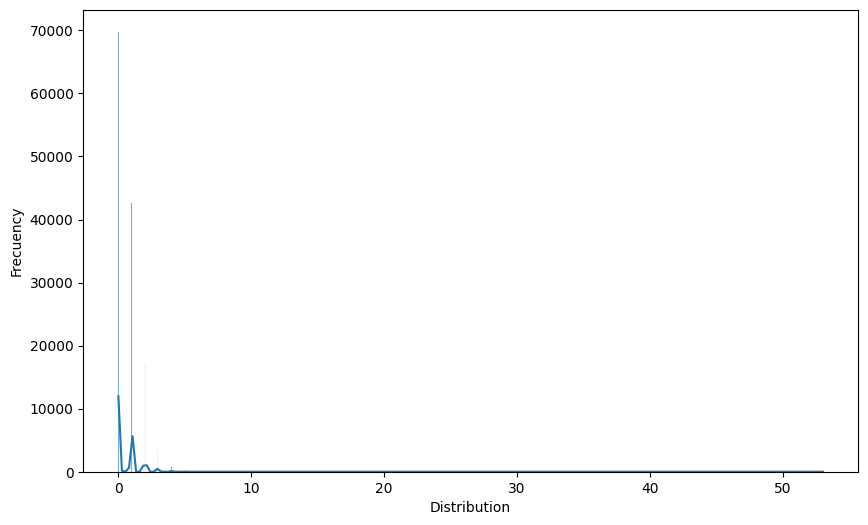

In [1313]:
#Visualization of the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id58_2', kde=True)
plt.xlabel('Distribution')
plt.ylabel('Frecuency')
plt.show()

id58_3: BROTHER (1ST GRADE).

In [1314]:
dataset['id58_3'].nunique()

14

In [1315]:
print(dataset['id58_3'].value_counts())

id58_3
1.0      13745
2.0       2718
3.0        583
4.0        198
5.0         38
7.0         12
12.0        10
6.0          6
10.0         3
8.0          2
14.0         2
11.0         1
105.0        1
9.0          1
Name: count, dtype: int64


In [1316]:
dataset['id58_3'] = dataset['id58_3'].fillna(0)

In [1317]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id58_3'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id59: Historical net premiums of the total number of clients linked to the client in question, who are considered as 1ST DEGREE OF LINKAGE.

In [1318]:
dataset['id59'].nunique()

32475

In [1319]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id59'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


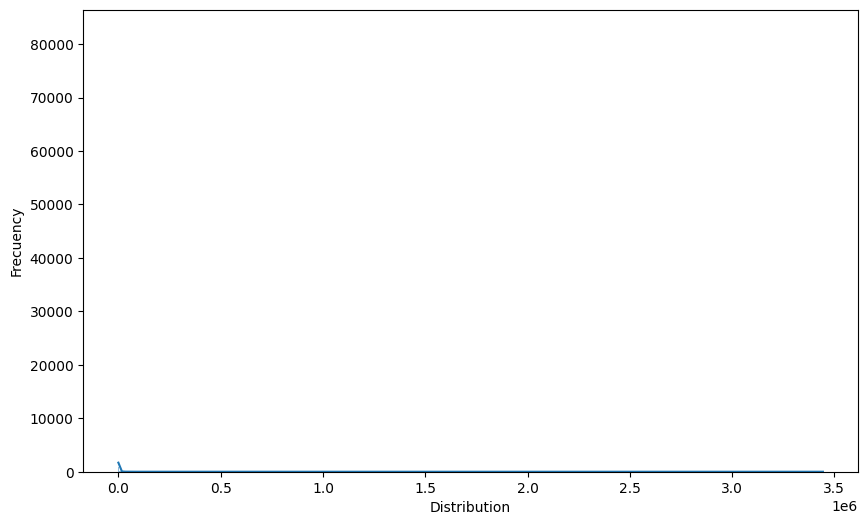

In [1320]:
#Visualization of the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='id59', kde=True)
plt.xlabel('Distribution')
plt.ylabel('Frecuency')
plt.show()

id60: Historical commissions paid by the total number of clients linked to the client in question, who are considered 1ST DEGREE OF LINKAGE.

In [1321]:
dataset['id60'].nunique()

29558

In [1322]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id60'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


id61: Historical cost of the total claims of clients linked to the client in question, which are considered as 1ST DEGREE OF LINKAGE.

In [1323]:
dataset['id61'].nunique()

26413

In [1324]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id61'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


C:\Users\eghorbanioskalaei\Anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


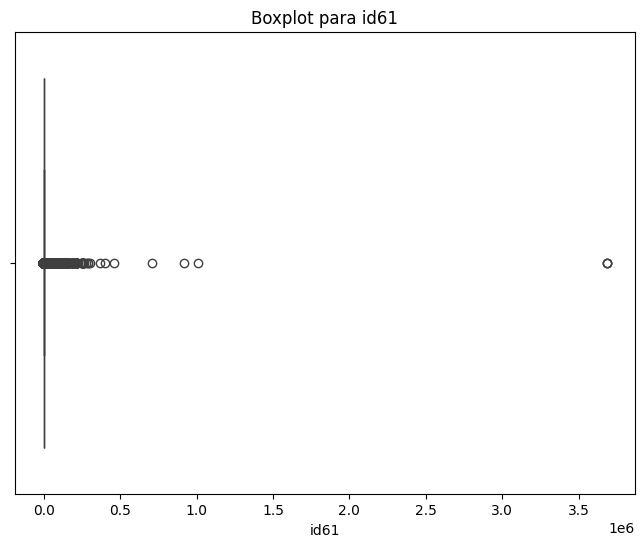

In [1325]:
# Crear un boxplot para la columna 'id34'
plt.figure(figsize=(8, 6))
sns.boxplot(x='id61', data=dataset)
plt.title('Boxplot para id61')
plt.xlabel('id61')
plt.show()

id66: usage.

In [1326]:
#print(dataset['id66'].value_counts())

id67:

In [1327]:
#print(dataset['id67'].value_counts())

In [1328]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id70'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 22.65%


In [1329]:
# Calculate the median accidents associated with each client ID
id70_median = dataset.groupby('id01')['id70'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, id70_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['id70'] = dataset['id70_median']

# Drop the columns used for merging
dataset.drop(columns=['id70_median'], inplace=True)

In [1330]:
dataset['id71'].unique()

array([4., 5., 2., 3., 0., 6.])

In [1331]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id71'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 11.57%


In [1332]:
# Calculate the median accidents associated with each client ID
id71_median = dataset.groupby('id01')['id71'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, id71_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['id71'] = dataset['id71_median']

# Drop the columns used for merging
dataset.drop(columns=['id71_median'], inplace=True)

In [1333]:
dataset['id72'].unique()

array(['D', 'G', 'L', 'X', 'E', 'P', 'Y', 'Z', 'B', 'R'], dtype=object)

In [1334]:
# Create a frequency table for vehicle types
vehicle_frequency = pd.crosstab(dataset['id01'], dataset['id72'])

# Ensure the columns are in the expected order and handle missing columns
expected_columns = ['D', 'E', 'G']
for col in expected_columns:
    if col not in vehicle_frequency.columns:
        vehicle_frequency[col] = 0  # Add missing columns with 0 frequency

# Reorder the columns to match expected order
vehicle_frequency = vehicle_frequency[expected_columns]

# Convert counts to percentages
vehicle_frequency = vehicle_frequency.div(vehicle_frequency.sum(axis=1), axis=0) * 100

# Reset the index to merge with the original DataFrame
vehicle_frequency = vehicle_frequency.reset_index()

# Rename the columns to more meaningful names
vehicle_frequency.rename(columns={'D': 'id72_diesel', 'E': 'id72_electric', 'G': 'id72_gas'}, inplace=True)

# Merge the percentage table with the original DataFrame
dataset = pd.merge(dataset, vehicle_frequency, on='id01', how='left')

# Drop the original vehicle_type column if no longer needed
dataset.drop(columns=['id72'], inplace=True)

In [1335]:
dataset.head()

id01  id02    id04           id05  \
0  00007f74a316bd9b4d567871e6efd507dbb4d23c     2  911906  JULIAN MANUEL   
1  000135522179f0a0b1d18975f7619facbfd66e48     2  919353          TANIA   
2  00016278627cd9e80ea8206620ae433bef0946b5     2  923173           SARA   
3  0001a5af481ef269ec8147319f5b412ab75fa6cf     2  870296          SONIA   
4  0001a5af481ef269ec8147319f5b412ab75fa6cf     2  797343          SONIA   

        id06       id08     id09_x id11_original id13_original id14_original  \
0 2021-10-08 2023-10-08 2022-10-08            BB             I      PROYECTA   
1 2022-02-22 2024-02-22        NaT            BB             F      PROYECTA   
2 2022-03-29 2023-03-29        NaT            NN             D       EXPANDE   
3 2020-03-06 2022-03-06 2021-03-06             B             B        OPTIMA   
4 2017-10-05 2023-10-05        NaT             B             E        OPTIMA   

      id15_original  id16  id17_original  id18_original                 id20  \
0        CORREDORES   2.0            180             73  2002-12-15 00:00:00   
1  AGTES.EXCLUSIVOS   3.0            300             40  2014-06-17 00:00:00   
2        CORREDORES   2.0             36            200  2017-11-23 00:00:00   
3        CORREDORES   7.0             20             51  2007-04-10 00:00:00   
4        CORREDORES   7.0             20             51  2007-04-10 00:00:00   

      id21   id24  id25_original  id26  id27  id28  id29_original  id30  \
0  41339.0  Rural            1.0     1     0     1              1     0   
1  30151.0  Rural            1.0     1     1     1              0     0   
2   3830.0  Rural            1.0     1     1     1              0     0   
3  13300.0  Rural            3.0     4     1     1              2     0   
4  13300.0  Rural            2.0     4     1     1              0     0   

   id31_original  id32  id33_original  id34  id35  id36  id37  id38  \
0              0     0              0     1     0  0.00  0.00   0.0   
1              0     1              0     2     0  0.50  0.50   0.0   
2              0     0              0     1     0  0.00  0.00   0.0   
3              0    10              0    12     0  0.83  0.83   0.0   
4              0    10              0    12     0  0.83  0.83   0.0   

   id39_original  id40_original     id41    id42    id43     id44    id45  \
0           0.00              0   342.44   37.67    0.00   342.44   37.67   
1           0.49              0   997.41  135.60   49.75   651.64   88.42   
2           0.00              0   921.34  141.32    0.00   597.92   91.71   
3           1.00              0  3105.67  407.10  722.04  2259.54  297.23   
4           0.31              0  3105.67  407.10  722.04  2259.54  297.23   

      id46     id47    id48    id49  id50_original  id51_original  \
0     0.00   342.44   37.67    0.00         354.44          38.98   
1    49.75   651.64   88.42   49.75         338.67          46.06   
2     0.00   597.92   91.71    0.00         293.10          44.96   
3  1009.58  1427.89  188.30  112.89         195.94          25.81   
4  1009.58  1427.89  188.30  112.89         218.29          28.54   

   id52_original  id53                   id54  id55_original  id57  id58_1  \
0           0.00     0      ANUAL DOMICILIADO          -40.0     4     0.0   
1           0.00     0  SEMESTRAL DOMICILIADO          -50.0     1     0.0   
2           0.00     0      ANUAL DOMICILIADO          -50.0     0     0.0   
3           0.00     0  SEMESTRAL DOMICILIADO          -50.0     0     1.0   
4         261.85     0  SEMESTRAL DOMICILIADO          -50.0     0     1.0   

   id58_2  id58_3      id59     id60     id61  id70_original  id71_original  \
0     0.0     0.0      0.00     0.00     0.00          130.0            4.0   
1     2.0     0.0  10744.18  1478.74  3036.22           90.0            5.0   
2     0.0     0.0      0.00     0.00     0.00           95.0            5.0   
3     0.0     0.0      0.00     0.00     0.00           90.0            5.0   


In [1336]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['id72_diesel'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1337]:
dataset['SINCOTotalVehiculos'].unique()

array([ 2.,  0.,  1., nan,  5.,  9.,  3.,  6.,  4., 13.,  7.,  8., 21.,
       10., 18., 15., 11., 16., 12., 14., 27., 19., 20., 17., 22., 48.])

In [1338]:
#!pip install miceforest

Filling the missing values using the miss forest technique

In [1339]:
#import miceforest as mf
#import random
#import sklearn.neighbors._base 
#import sys
#sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [1340]:
nan_count_variable = dataset['SINCOTotalVehiculos'].isnull().sum()
print(nan_count_variable)

34768


In [1341]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['SINCOTotalVehiculos'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 6.88%


In [1342]:
# Group by client ID and select the maximum SINCOTotalVehiculos for each group
max_scores_SINCOTotalVehiculos = dataset.groupby('id01')['SINCOTotalVehiculos'].max().reset_index()

# Merge the max_scores DataFrame with the original dataset to replace all scores with the maximum score for each client
dataset = pd.merge(dataset, max_scores_SINCOTotalVehiculos, on='id01', suffixes=('_original', '_max'))

# Replace the original scores with the maximum scores
dataset['SINCOTotalVehiculos'] = dataset['SINCOTotalVehiculos_max']

# Drop the columns used for merging
dataset.drop(columns=['SINCOTotalVehiculos_max'], inplace=True)

In [1343]:
dataset['SINCOMatriculaIncluida'].unique()

array([ 0.,  1., nan])

In [1344]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['SINCOMatriculaIncluida'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 5.13%


In [1345]:
# Sort the DataFrame by client ID and score in descending order
dataset.sort_values(by=['id01', 'SINCOMatriculaIncluida'], ascending=[True, False], inplace=True)

# Group by client ID and select the last score for each group
last_scores_SINCOMatriculaIncluida = dataset.groupby('id01')['SINCOMatriculaIncluida'].first().reset_index()

# Merge the last_scores DataFrame with the original dataset to replace all scores with the last score for each client
dataset = pd.merge(dataset, last_scores_SINCOMatriculaIncluida, on='id01', suffixes=('_original', '_last'))

# Replace the original scores with the last scores
dataset['SINCOMatriculaIncluida'] = dataset['SINCOMatriculaIncluida_last']

# Drop the columns used for merging
dataset.drop(columns=['SINCOMatriculaIncluida_last'], inplace=True)

In [1346]:
dataset['AceptoCulpaSinAntecedentes'].unique()

array([0, 1], dtype=int64)

In [1347]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['AceptoCulpaSinAntecedentes'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 1.26%


In [1348]:
# Create a frequency table for vehicle types
vehicle_frequency = pd.crosstab(dataset['id01'], dataset['AceptoCulpaSinAntecedentes'])

# Convert counts to percentages
vehicle_frequency = vehicle_frequency.div(vehicle_frequency.sum(axis=1), axis=0) * 100

# Reset the index to merge with the original DataFrame
vehicle_frequency = vehicle_frequency.reset_index()


# Rename the columns to more meaningful names
vehicle_frequency.rename(columns={0: 'AceptoCulpa_yes_contact', 1: 'AceptoCulpa_no_contact'}, inplace=True)


# Merge the percentage table with the original DataFrame
dataset = pd.merge(dataset, vehicle_frequency, on='id01', how='left')

# Drop the original vehicle_type column if no longer needed
dataset.drop(columns=['AceptoCulpaSinAntecedentes'], inplace=True)

In [1349]:
dataset['ContrataLunas'].unique()

array([1, 0], dtype=int64)

In [1350]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['ContrataLunas'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 1.30%


In [1351]:
# Create a frequency table for vehicle types
vehicle_frequency = pd.crosstab(dataset['id01'], dataset['ContrataLunas'])

# Convert counts to percentages
vehicle_frequency = vehicle_frequency.div(vehicle_frequency.sum(axis=1), axis=0) * 100

# Reset the index to merge with the original DataFrame
vehicle_frequency = vehicle_frequency.reset_index()


# Rename the columns to more meaningful names
vehicle_frequency.rename(columns={1: 'ContrataLunas_yes_contract', 0: 'ContrataLunas_no_contract'}, inplace=True)


# Merge the percentage table with the original DataFrame
dataset = pd.merge(dataset, vehicle_frequency, on='id01', how='left')

# Drop the original vehicle_type column if no longer needed
dataset.drop(columns=['ContrataLunas'], inplace=True)

In [1352]:
dataset['ContrataLunas_no_contract'].unique()

array([  0.        , 100.        ,  50.        ,  33.33333333,
        25.        ,  14.28571429,  20.        ,  90.90909091,
        66.66666667,   9.09090909,  16.66666667,  12.5       ,
        40.        ,  28.57142857,  80.        ,  10.        ,
        75.        ,  62.5       ,  18.18181818,  91.66666667,
        30.        ,  60.        ,  95.65217391,  11.11111111,
        87.5       ,  15.38461538,  55.55555556,  57.14285714,
        22.22222222,  36.36363636,  61.53846154,  88.88888889,
        44.44444444])

In [1353]:
dataset['ContrataAsistencia'].unique()

array([1, 0], dtype=int64)

In [1354]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['ContrataAsistencia'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 0.72%


In [1355]:
# Create a frequency table for vehicle types
vehicle_frequency = pd.crosstab(dataset['id01'], dataset['ContrataAsistencia'])

# Convert counts to percentages
vehicle_frequency = vehicle_frequency.div(vehicle_frequency.sum(axis=1), axis=0) * 100

# Reset the index to merge with the original DataFrame
vehicle_frequency = vehicle_frequency.reset_index()


# Rename the columns to more meaningful names
vehicle_frequency.rename(columns={1: 'ContrataAsistencia_yes_contract', 0: 'ContrataAsistencia_no_contract'}, inplace=True)


# Merge the percentage table with the original DataFrame
dataset = pd.merge(dataset, vehicle_frequency, on='id01', how='left')

# Drop the original vehicle_type column if no longer needed
dataset.drop(columns=['ContrataAsistencia'], inplace=True)

In [1356]:
dataset['ContrataAsistencia_yes_contract'].unique()

array([100.        ,   0.        ,  50.        ,  66.66666667,
        75.        ,  33.33333333,  71.42857143,  83.33333333,
        80.        ,  20.        ,  25.        ,  37.5       ,
        62.5       ,  60.        ,  81.81818182,  85.71428571,
         8.33333333,   4.34782609,  90.        ,  92.85714286,
        12.5       ,  92.30769231,  88.88888889,  87.5       ,
        90.90909091,  11.11111111])

In [1357]:
dataset['ContrataDanyosPropios'].unique()

array([0, 1], dtype=int64)

In [1358]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['ContrataDanyosPropios'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 7.45%


In [1359]:
# Create a frequency table for vehicle types
vehicle_frequency = pd.crosstab(dataset['id01'], dataset['ContrataDanyosPropios'])

# Convert counts to percentages
vehicle_frequency = vehicle_frequency.div(vehicle_frequency.sum(axis=1), axis=0) * 100

# Reset the index to merge with the original DataFrame
vehicle_frequency = vehicle_frequency.reset_index()


# Rename the columns to more meaningful names
vehicle_frequency.rename(columns={1: 'ContrataDanyosPropios_yes_contract', 0: 'ContrataDanyosPropios_no_contract'}, inplace=True)


# Merge the percentage table with the original DataFrame
dataset = pd.merge(dataset, vehicle_frequency, on='id01', how='left')

# Drop the original vehicle_type column if no longer needed
dataset.drop(columns=['ContrataDanyosPropios'], inplace=True)

In [1360]:
dataset['ContrataDanyosPropios_yes_contract'].unique()

array([  0.        ,  50.        , 100.        ,  33.33333333,
        66.66666667,  25.        ,  14.28571429,  16.66666667,
        20.        ,  40.        ,  75.        ,  28.57142857,
        42.85714286,   9.09090909,  12.5       ,  11.11111111,
        80.        ,  60.        ,  83.33333333,  10.        ,
        70.        ,  22.22222222,  18.18181818,   8.33333333,
        57.14285714,  30.        ,  85.71428571,   7.69230769,
        62.5       ,   4.34782609,  27.27272727,  44.44444444,
        37.5       ])

In [1361]:
dataset['DGC_007'].unique()

array([0.        , 0.9974522 , 0.08139299, ..., 2.24260418, 0.03818909,
       0.33674714])

In [1362]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['DGC_020'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1363]:
dataset['IGN_001'].unique()

array([ 28847.82888181,  32304.41353886,  33006.17841714, ...,
       107780.64579761,  56064.5470134 , 108039.61752777])

In [1364]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['IGN_001'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1365]:
dataset['INE_001'].nunique()

2302

In [1366]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['INE_057'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1367]:
dataset['OSM_001'].unique()

array([3982.12035049,  666.72006118,  598.11274802, ..., 7547.16500769,
       4203.99136262, 4473.84168453])

In [1368]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['SEA_010'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1369]:
dataset['ProvinciaID'].unique()

array([41., 30.,  3., 13., 46., 18., 11., 14., 36., 29., 12., 21.,  2.,
        4., 22., 23., 43., 16., 28., 35., 45.,  1., 25.,  7., 48., 34.,
        8., 44.,  6., 17., 20., 50., 15., 39., 10., 32., 33., 37., 24.,
       40., 42., 27., 31., 19., 38., 47.,  9., 26., 49.,  5., 51.])

In [1370]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['ProvinciaID'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1371]:
# Drop rows where 'variable' column has missing values
dataset = dataset.dropna(subset=['ProvinciaID'])

In [1372]:
dataset['ComarcaID'].nunique()

76

In [1373]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['ComarcaID'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


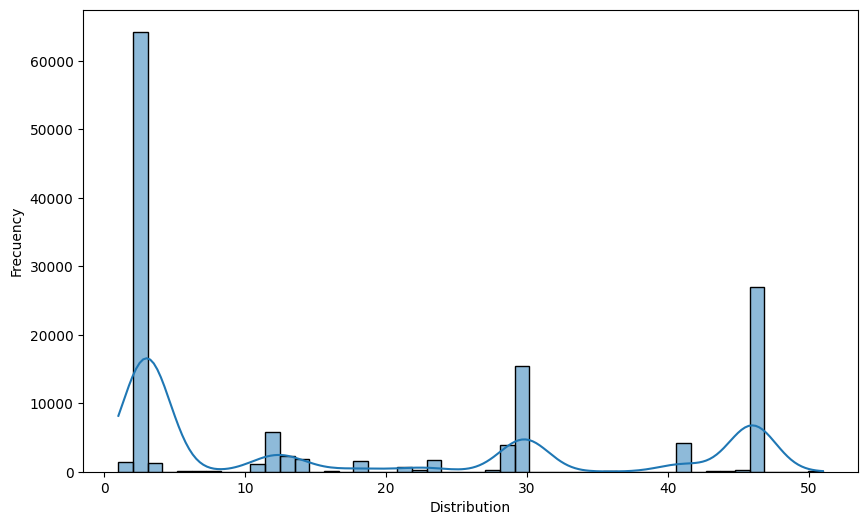

In [1374]:
#Visualization of the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='ProvinciaID', kde=True)
plt.xlabel('Distribution')
plt.ylabel('Frecuency')
plt.show()

In [1375]:
print(dataset['ProvinciaID'].value_counts())

ProvinciaID
3.0     64281
46.0    26927
30.0    15402
12.0     5867
41.0     4260
29.0     3942
13.0     2263
14.0     1881
23.0     1708
18.0     1500
2.0      1450
4.0      1227
11.0     1135
21.0      746
28.0      233
22.0      217
45.0      179
16.0      119
7.0        92
8.0        86
43.0       65
6.0        64
50.0       52
36.0       46
44.0       39
17.0       29
48.0       29
35.0       29
39.0       24
24.0       22
31.0       15
33.0       14
15.0       14
38.0       12
25.0       11
10.0       11
32.0       10
20.0        9
26.0        8
42.0        7
27.0        6
37.0        5
1.0         5
47.0        4
5.0         4
19.0        4
40.0        4
9.0         3
49.0        3
34.0        2
51.0        2
Name: count, dtype: int64


In [1376]:
print(dataset['ComarcaID'].value_counts())

ComarcaID
6.0     14147
3.0     12167
7.0     10688
5.0      8350
43.0     7219
2.0      6693
67.0     6554
44.0     6241
69.0     5847
70.0     5749
1.0      5510
65.0     5008
4.0      4696
54.0     4178
41.0     3939
24.0     2935
21.0     2263
8.0      2010
25.0     1895
66.0     1887
68.0     1871
35.0     1706
30.0     1495
9.0      1448
77.0     1432
20.0     1226
10.0     1219
17.0     1134
33.0      744
22.0      563
23.0      467
78.0      406
80.0      351
79.0      335
40.0      233
32.0      217
64.0      179
76.0      137
26.0      119
12.0       86
34.0       84
56.0       64
13.0       64
73.0       52
51.0       46
62.0       39
61.0       35
60.0       30
27.0       29
14.0       29
28.0       29
52.0       24
37.0       22
55.0       15
45.0       15
46.0       14
16.0       14
63.0       12
36.0       11
18.0       11
47.0       10
59.0        9
38.0        8
50.0        8
58.0        7
39.0        6
53.0        5
72.0        5
71.0        4
57.0        4
31.0      

In [1377]:
dataset['NacionalidadID'].unique()

array([195., 143., 186., 174., 105., 169.,  33., 117.,  63., 218.,  15.,
       161., 202., 223., 220., 107.,  30., 123.,  74.,  47.,  81.,  26.,
       150.,  44.,  55.,  10.,  21.,   3.,  99., 103., 194., 175.,  43.,
        64.,  22., 166., 130.,  65.,  97., 159., 165., 227., 101.,   0.,
       226.,  95., 201.,  53., 170., 131., 139., 221., 155.,  73.,  57.,
       233.,  11.,  80., 148.,  52., 249.,  nan,  14., 240.,   1.,  56.,
       129., 247., 191., 115.,  61., 167.,  98.,  27., 153.,  20.,  58.,
       228., 109., 126., 137., 211.,  90., 149.,  89., 213.,  66.,  18.,
       108.,  79.,   6.,  39., 112., 144.,   5., 154.,  91.,  37., 134.,
        93., 203., 185., 190.,  60., 135., 163.,  38.,   2.,  68.,  42.,
        34., 124.,  19.,  84.,  76.,  35., 140., 172.,  82., 212., 100.,
        13., 121.,  54.,  83., 229., 110.,  78.])

In [1378]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['NacionalidadID'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1379]:
#dataset['Subramo'].nunique()

In [1380]:
# Group the data by Client ID and count the unique scores for each ID
#score_counts = dataset.groupby('id01')['Subramo'].nunique()

# Check if any client ID has more than one unique score
#if (score_counts > 1).any():
#    print("Some client IDs have non-unique values.")
#else:
#    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
#non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
#total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
#percentage_non_unique = (non_unique_count / total_unique_count) * 100

#print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

In [1381]:
dataset['ScoreAda'].nunique()

1503

In [1382]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['ScoreAda'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 15.39%


In [1383]:
# Calculate the median accidents associated with each client ID
ScoreAda_median = dataset.groupby('id01')['ScoreAda'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, ScoreAda_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['ScoreAda'] = dataset['ScoreAda_median']

# Drop the columns used for merging
dataset.drop(columns=['ScoreAda_median'], inplace=True)

In [1384]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['ScoreAda'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1385]:
dataset['ConductorID'].unique()

array(['00007f74a316bd9b4d567871e6efd507dbb4d23c',
       '000135522179f0a0b1d18975f7619facbfd66e48',
       '00016278627cd9e80ea8206620ae433bef0946b5', ...,
       'fffdd4b9a08a1ebd4c195c2211d021f0bd00a6be',
       'ffff2a798eba4aef23f9e920738f914e3f3d7208',
       'fffff2247d7c108aed3e0d9e2182235dcd465713'], dtype=object)

In [1386]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['ConductorID'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 5.85%


In [1387]:
# Drop rows where 'variable' column has missing values
dataset = dataset.dropna(subset=['ConductorID'])

In [1388]:
dataset['Conductor2ID'].nunique()

21647

In [1389]:
dataset['Flota'].unique()

array([nan])

In [1390]:
# Replace non-missing values with 1
#dataset['Flota'] = dataset['Flota'].where(dataset['Flota'].isnull(), 1)

In [1391]:
#filling the missing values
#dataset['Flota'] = dataset['Flota'].fillna(0)

In [1392]:
#dataset['Flota'].unique()

In [1393]:
dataset['SiniestralidadTotalPoliza'].nunique()

58567

In [1394]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['SiniestralidadTotalPoliza'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 21.09%


In [1395]:
# Calculate the median accidents associated with each client ID
SiniestralidadTotalPoliza_median = dataset.groupby('id01')['SiniestralidadTotalPoliza'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, SiniestralidadTotalPoliza_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['SiniestralidadTotalPoliza'] = dataset['SiniestralidadTotalPoliza_median']

# Drop the columns used for merging
dataset.drop(columns=['SiniestralidadTotalPoliza_median'], inplace=True)

In [1396]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['SiniestralidadTotalPoliza'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1397]:
dataset['SiniestralidadTotalPoliza'].nunique()

48892

In [1398]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['NumeroSiniestrosTotalPoliza'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 19.48%


In [1399]:
# Calculate the median accidents associated with each client ID
NumeroSiniestrosTotalPoliza_median = dataset.groupby('id01')['NumeroSiniestrosTotalPoliza'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, NumeroSiniestrosTotalPoliza_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['NumeroSiniestrosTotalPoliza'] = dataset['NumeroSiniestrosTotalPoliza_median']

# Drop the columns used for merging
dataset.drop(columns=['NumeroSiniestrosTotalPoliza_median'], inplace=True)

In [1400]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['NumeroSiniestrosTotalPoliza'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1401]:
dataset['NumeroSiniestrosTotalPoliza'].unique()

array([ 0. ,  1. ,  2. ,  3. ,  6. ,  0.5,  4. ,  1.5,  5. ,  2.5,  5.5,
        3.5, 11. , 14. ,  8. ,  9. ,  7. , 10. ,  4.5, 12. , 21. ,  6.5,
       17. ,  9.5, 15. , 13. , 18. , 22. ,  7.5,  8.5, 20. , 19. , 10.5,
       24. , 21.5, 12.5, 16. , 27. , 23. , 30. , 11.5, 13.5, 36. , 26. ,
       33. , 34. , 44. ])

In [1402]:
# Calcular la cantidad de NaN por variable
nan_counts = dataset.isna().sum()

# Calcular el porcentaje de NaN por variable
nan_percentages = (nan_counts / len(dataset)) * 100

# Crear un DataFrame para mostrar los resultados
nan_summary = pd.DataFrame({'NaN Count': nan_counts, 'NaN Percentage': nan_percentages})
nan_summary = nan_summary.sort_values(by='NaN Percentage', ascending=False)

# Configurar pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Mostrar el resumen de valores nulos con porcentajes
print(nan_summary)

                                      NaN Count  NaN Percentage
date_of_birth                            134066      100.000000
Flota                                    134066      100.000000
Conductor2ID                             111078       82.853222
id09_x                                    65387       48.772247
how_to_pay_original                       43378       32.355705
when_to_pay_original                      43227       32.243074
SINCOTotalVehiculos_original              34768       25.933495
SINCOMatriculaIncluida_original           34768       25.933495
when_to_pay                               34225       25.528471
how_to_pay                                34015       25.371832
SINCOMatriculaIncluida                    24862       18.544597
SINCOTotalVehiculos                       24862       18.544597
SEA_004                                   17642       13.159190
SEA_003                                   17642       13.159190
SEA_001                                 

In [1403]:
dataset['Propietario'].unique()

array(['00007f74a316bd9b4d567871e6efd507dbb4d23c',
       '000135522179f0a0b1d18975f7619facbfd66e48',
       '00016278627cd9e80ea8206620ae433bef0946b5', ...,
       'fffdd4b9a08a1ebd4c195c2211d021f0bd00a6be',
       'ffff2a798eba4aef23f9e920738f914e3f3d7208',
       'fffff2247d7c108aed3e0d9e2182235dcd465713'], dtype=object)

In [1404]:
# Drop rows where 'variable' column has missing values
dataset = dataset.dropna(subset=['Propietario'])

In [1405]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['Propietario'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 10.36%


In [1406]:
# Group the data by Client ID and count the unique scores for each ID
#score_counts = dataset.groupby('id01')['CiaAnteriorID'].nunique()

# Check if any client ID has more than one unique score
#if (score_counts > 1).any():
#    print("Some client IDs have non-unique values.")
#else:
#    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
#non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
#total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
#percentage_non_unique = (non_unique_count / total_unique_count) * 100

#print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

In [1407]:
# Generate dichotomous variables according to conditions
dataset['risk_0'] = ((dataset['id01'] == dataset['Propietario']) & (dataset['Propietario'] == dataset['ConductorID'])).astype(int)
dataset['risk_4'] = ((dataset['ConductorID'] != dataset['id01']) & (dataset['id01'] == dataset['Propietario'])).astype(int)
dataset['risk_3'] = ((dataset['ConductorID'] == dataset['Propietario']) & (dataset['Propietario'] != dataset['id01'])).astype(int)
dataset['risk_2'] = ((dataset['ConductorID'] == dataset['id01']) & (dataset['id01'] != dataset['Propietario'])).astype(int)

# For risk_1, since that is when everyone is different, the condition is more complex:
dataset['risk_1'] = ((dataset['id01'] != dataset['Propietario']) & (dataset['Propietario'] != dataset['ConductorID']) & (dataset['id01'] != dataset['ConductorID'])).astype(int)

# Show first rows to check new columns
print(dataset[['risk_0', 'risk_1', 'risk_2', 'risk_3', 'risk_4']].head())

   risk_0  risk_1  risk_2  risk_3  risk_4
0       1       0       0       0       0
1       1       0       0       0       0
2       1       0       0       0       0
3       1       0       0       0       0
4       1       0       0       0       0


In [1408]:
dataset.head()

id01  id02    id04           id05  \
0  00007f74a316bd9b4d567871e6efd507dbb4d23c     2  911906  JULIAN MANUEL   
1  000135522179f0a0b1d18975f7619facbfd66e48     2  919353          TANIA   
2  00016278627cd9e80ea8206620ae433bef0946b5     2  923173           SARA   
3  0001a5af481ef269ec8147319f5b412ab75fa6cf     2  870296          SONIA   
4  0001a5af481ef269ec8147319f5b412ab75fa6cf     2  797343          SONIA   

        id06       id08     id09_x id11_original id13_original id14_original  \
0 2021-10-08 2023-10-08 2022-10-08            BB             I      PROYECTA   
1 2022-02-22 2024-02-22        NaT            BB             F      PROYECTA   
2 2022-03-29 2023-03-29        NaT            NN             D       EXPANDE   
3 2020-03-06 2022-03-06 2021-03-06             B             B        OPTIMA   
4 2017-10-05 2023-10-05        NaT             B             E        OPTIMA   

      id15_original  id16  id17_original  id18_original                 id20  \
0        CORREDORES   2.0            180             73  2002-12-15 00:00:00   
1  AGTES.EXCLUSIVOS   3.0            300             40  2014-06-17 00:00:00   
2        CORREDORES   2.0             36            200  2017-11-23 00:00:00   
3        CORREDORES   7.0             20             51  2007-04-10 00:00:00   
4        CORREDORES   7.0             20             51  2007-04-10 00:00:00   

      id21   id24  id25_original  id26  id27  id28  id29_original  id30  \
0  41339.0  Rural            1.0     1     0     1              1     0   
1  30151.0  Rural            1.0     1     1     1              0     0   
2   3830.0  Rural            1.0     1     1     1              0     0   
3  13300.0  Rural            3.0     4     1     1              2     0   
4  13300.0  Rural            2.0     4     1     1              0     0   

   id31_original  id32  id33_original  id34  id35  id36  id37  id38  \
0              0     0              0     1     0  0.00  0.00   0.0   
1              0     1              0     2     0  0.50  0.50   0.0   
2              0     0              0     1     0  0.00  0.00   0.0   
3              0    10              0    12     0  0.83  0.83   0.0   
4              0    10              0    12     0  0.83  0.83   0.0   

   id39_original  id40_original     id41    id42    id43     id44    id45  \
0           0.00              0   342.44   37.67    0.00   342.44   37.67   
1           0.49              0   997.41  135.60   49.75   651.64   88.42   
2           0.00              0   921.34  141.32    0.00   597.92   91.71   
3           1.00              0  3105.67  407.10  722.04  2259.54  297.23   
4           0.31              0  3105.67  407.10  722.04  2259.54  297.23   

      id46     id47    id48    id49  id50_original  id51_original  \
0     0.00   342.44   37.67    0.00         354.44          38.98   
1    49.75   651.64   88.42   49.75         338.67          46.06   
2     0.00   597.92   91.71    0.00         293.10          44.96   
3  1009.58  1427.89  188.30  112.89         195.94          25.81   
4  1009.58  1427.89  188.30  112.89         218.29          28.54   

   id52_original  id53                   id54  id55_original  id57  id58_1  \
0           0.00     0      ANUAL DOMICILIADO          -40.0     4     0.0   
1           0.00     0  SEMESTRAL DOMICILIADO          -50.0     1     0.0   
2           0.00     0      ANUAL DOMICILIADO          -50.0     0     0.0   
3           0.00     0  SEMESTRAL DOMICILIADO          -50.0     0     1.0   
4         261.85     0  SEMESTRAL DOMICILIADO          -50.0     0     1.0   

   id58_2  id58_3      id59     id60     id61  id70_original  id71_original  \
0     0.0     0.0      0.00     0.00     0.00          130.0            4.0   
1     2.0     0.0  10744.18  1478.74  3036.22           90.0            5.0   
2     0.0     0.0      0.00     0.00     0.00           95.0            5.0   
3     0.0     0.0      0.00     0.00     0.00           90.0            5.0   


In [1409]:
dataset['risk_0'].unique()

array([1, 0])

In [1410]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['risk_4'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 1.64%


In [1411]:
# Calculate the median accidents associated with each client ID
risk_median = dataset.groupby('id01')['risk_0'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, risk_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['risk_0'] = dataset['risk_0_median']

# Drop the columns used for merging
dataset.drop(columns=['risk_0_median'], inplace=True)

In [1412]:
# Calculate the median accidents associated with each client ID
risk_median = dataset.groupby('id01')['risk_1'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, risk_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['risk_1'] = dataset['risk_1_median']

# Drop the columns used for merging
dataset.drop(columns=['risk_1_median'], inplace=True)

In [1413]:
# Calculate the median accidents associated with each client ID
risk_median = dataset.groupby('id01')['risk_2'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, risk_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['risk_2'] = dataset['risk_2_median']

# Drop the columns used for merging
dataset.drop(columns=['risk_2_median'], inplace=True)

In [1414]:
# Calculate the median accidents associated with each client ID
risk_median = dataset.groupby('id01')['risk_3'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, risk_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['risk_3'] = dataset['risk_3_median']

# Drop the columns used for merging
dataset.drop(columns=['risk_3_median'], inplace=True)

In [1415]:
# Calculate the median accidents associated with each client ID
risk_median = dataset.groupby('id01')['risk_4'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, risk_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['risk_4'] = dataset['risk_4_median']

# Drop the columns used for merging
dataset.drop(columns=['risk_4_median'], inplace=True)

In [1416]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['ExposicionTotalPoliza'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 23.80%


In [1417]:
dataset['ExposicionTotalPoliza'].nunique()

7188

In [1418]:
# Calculate the median accidents associated with each client ID
ExposicionTotalPoliza_median = dataset.groupby('id01')['ExposicionTotalPoliza'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, ExposicionTotalPoliza_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['ExposicionTotalPoliza'] = dataset['ExposicionTotalPoliza_median']

# Drop the columns used for merging
dataset.drop(columns=['ExposicionTotalPoliza_median'], inplace=True)

In [1419]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['ExposicionTotalPoliza'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1420]:
dataset['ExposicionTotalPoliza'].nunique()

9778

In [1421]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['ComisionTotalPoliza'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 24.10%


In [1422]:
dataset['ComisionTotalPoliza'].nunique()

47321

In [1423]:
# Calculate the median accidents associated with each client ID
ComisionTotalPoliza_median = dataset.groupby('id01')['ComisionTotalPoliza'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, ComisionTotalPoliza_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['ComisionTotalPoliza'] = dataset['ComisionTotalPoliza_median']

# Drop the columns used for merging
dataset.drop(columns=['ComisionTotalPoliza_median'], inplace=True)

In [1424]:
dataset['ComisionTotalPoliza'].nunique()

48871

In [1425]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['ComisionTotalPoliza'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1426]:
dataset['PrimaTotalPoliza'].nunique()

105427

In [1427]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['PrimaTotalPoliza'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

Some client IDs have non-unique values.
Percentage of client IDs with non-unique values: 24.64%


In [1428]:
# Calculate the median accidents associated with each client ID
PrimaTotalPoliza_median = dataset.groupby('id01')['PrimaTotalPoliza'].median().reset_index()

# Merge the accidents_median DataFrame with the original dataset to replace all scores with the median score for each client
dataset = pd.merge(dataset, PrimaTotalPoliza_median, on='id01', suffixes=('_original', '_median'))

# Replace the original scores with the median scores
dataset['PrimaTotalPoliza'] = dataset['PrimaTotalPoliza_median']

# Drop the columns used for merging
dataset.drop(columns=['PrimaTotalPoliza_median'], inplace=True)

In [1429]:
# Group the data by Client ID and count the unique scores for each ID
score_counts = dataset.groupby('id01')['PrimaTotalPoliza'].nunique()

# Check if any client ID has more than one unique score
if (score_counts > 1).any():
    print("Some client IDs have non-unique values.")
else:
    print("All client IDs have unique values.")

# Calculate the number of client IDs with non-unique scores
non_unique_count = (score_counts > 1).sum()

# Calculate the total number of unique client IDs
total_unique_count = score_counts.shape[0]

# Calculate the percentage of client IDs with non-unique scores
percentage_non_unique = (non_unique_count / total_unique_count) * 100

print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%")

All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%


In [1430]:
dataset['NacionalidadID']= dataset['NacionalidadID'].fillna(0)

In [1431]:
dataset.shape

(134062, 232)

# Filling the missing values

In [1432]:
# List of columns for which we want to fill missing values with median
'''
columns_to_fill = ['DGC_001', 'DGC_002', 'DGC_003', 'DGC_004','DGC_005','DGC_006','DGC_007','DGC_008','DGC_009','DGC_010',
                   'DGC_011','DGC_012','DGC_013','DGC_014','DGC_015','DGC_016', 'DGC_017', 'DGC_018','DGC_019','DGC_020',
                   'DGT_001', 'DGT_002','IGN_001',"INE_001", "INE_002", "INE_003", "INE_004", "INE_005","INE_006", 
                   "INE_007", "INE_008", "INE_009", "INE_010", "INE_011", "INE_012", "INE_013", "INE_014", "INE_015",
                   "INE_016", "INE_017", "INE_018", "INE_019", "INE_020", "INE_021", "INE_022", "INE_023", "INE_024", "INE_025",
                   "INE_026", "INE_027", "INE_028", "INE_029", "INE_030", "INE_031", "INE_032", "INE_033", "INE_034", "INE_035",
                   "INE_036", "INE_037", "INE_038", "INE_039", "INE_040", "INE_041", "INE_042", "INE_043", "INE_044", "INE_045",
                   "INE_046", "INE_047", "INE_048", "INE_049", "INE_050", "INE_051", "INE_052", "INE_053", "INE_054", "INE_055",
                   "INE_056", "INE_057", "OSM_001", "REP_001", "REP_002", "REP_003", "REP_004", "REP_005", "REP_006", "REP_007",
                   "REP_008", "REP_009", "REP_010", 'SINCOTotalVehiculos', 'SINCOMatriculaIncluida', 'date_of_birth']

# Create a dictionary with column names as keys and their median values as values
medians = {column: dataset[column].median() for column in columns_to_fill}

# Use the fillna method with the medians dictionary to fill missing values
dataset.fillna(value=medians, inplace=True)
'''

'\ncolumns_to_fill = [\'DGC_001\', \'DGC_002\', \'DGC_003\', \'DGC_004\',\'DGC_005\',\'DGC_006\',\'DGC_007\',\'DGC_008\',\'DGC_009\',\'DGC_010\',\n                   \'DGC_011\',\'DGC_012\',\'DGC_013\',\'DGC_014\',\'DGC_015\',\'DGC_016\', \'DGC_017\', \'DGC_018\',\'DGC_019\',\'DGC_020\',\n                   \'DGT_001\', \'DGT_002\',\'IGN_001\',"INE_001", "INE_002", "INE_003", "INE_004", "INE_005","INE_006", \n                   "INE_007", "INE_008", "INE_009", "INE_010", "INE_011", "INE_012", "INE_013", "INE_014", "INE_015",\n                   "INE_016", "INE_017", "INE_018", "INE_019", "INE_020", "INE_021", "INE_022", "INE_023", "INE_024", "INE_025",\n                   "INE_026", "INE_027", "INE_028", "INE_029", "INE_030", "INE_031", "INE_032", "INE_033", "INE_034", "INE_035",\n                   "INE_036", "INE_037", "INE_038", "INE_039", "INE_040", "INE_041", "INE_042", "INE_043", "INE_044", "INE_045",\n                   "INE_046", "INE_047", "INE_048", "INE_049", "INE_050", "INE

Since some of the variables are in orange colour and they are not unique for each client or they are not 
reliable, I am deleting these variables.

id06: Policy start date- it is not unique for the clients
id08: Policy expiration date: not unique for the clients
id09: Policy cancellation date: not unique for the clients
id54: Final payment method of the reference policy- it is not unique for the clients
id55: Bonus that the client has in the reference period in the event that they have contracted an auto policy - it is not unique for the clients

id20: Drivers' licenses starting date. - for 9% of the clients it is not unique
id04: The codes of the policies- It is unique for the policies not clients.

 
Subramo: type of vehicle- Single value per policy. For 16% of the clients, there is not a unique value per id. 

conductor2ID: it is not unique for the clients
ConductorID: it is not unique for the clients
Propietario: it is not unique for the clients


In [1433]:
# Remove variables
deletelist2= ['Flota','id02', 'id05', 'id06', 'id08', 'id09_original', 'policy_duration', 'NumeroSiniestrosTotalPoliza_original'
             , 'ExposicionTotalPoliza_original', 'ExposicionTotalPoliza_original', 'SiniestralidadTotalPoliza_original'
             ,'ComisionTotalPoliza_original', 'PrimaTotalPoliza_original', 'ScoreAda_original','how_to_pay_original', 'when_to_pay_original'
              ,'id51_original','id52_original', 'id50_original', 'id40_original', 'id18_original', 'id17_original', 'id14_original', 
              'id15_original', 'id13_original', 'id11_original', 'risk_0_original', 'risk_1_original', 'risk_2_original', 'risk_3_original', 
              'risk_4_original', 'id39_original', 'id33_original', 'id31_original', 'id29_original', 'id25_original', 'id04', 'id20', 'Subramo', 
              'Conductor2ID', 'ConductorID', 'Propietario', 'SINCOTotalVehiculos_original', 'SINCOMatriculaIncluida_original',
             'Age_original', 'date_of_birth', "SEA_001", "SEA_002", "SEA_003", "SEA_004", "SEA_005", "SEA_006", "SEA_007",
                   "SEA_008", "SEA_009", "SEA_010", 'id70_original', 'id71_original', 'id55_original', 'id09_x', 'id54' ]
dataset= dataset.drop(deletelist2, axis= 1)

In [1434]:
# List to hold the results for each column
results = []

# Columns to check (excluding 'id01')
columns_to_check = [col for col in dataset.columns if col != 'id01']

for col in columns_to_check:
    # Group the data by Client ID and count the unique values for each ID
    unique_counts = dataset.groupby('id01')[col].nunique()

    # Check if any client ID has more than one unique value
    non_unique_count = (unique_counts > 1).sum()

    # Calculate the total number of unique client IDs
    total_unique_count = unique_counts.shape[0]

    # Calculate the percentage of client IDs with non-unique values
    percentage_non_unique = (non_unique_count / total_unique_count) * 100

    # Store the result
    results.append({
        'column': col,
        'non_unique_count': non_unique_count,
        'total_unique_count': total_unique_count,
        'percentage_non_unique': percentage_non_unique
    })

    # Print the result for the current column
    print(f"Column: {col}")
    if non_unique_count > 0:
        print("Some client IDs have non-unique values.")
    else:
        print("All client IDs have unique values.")
    print(f"Percentage of client IDs with non-unique values: {percentage_non_unique:.2f}%\n")

# If you want to store the results in a DataFrame for further analysis
results_df = pd.DataFrame(results)
print(results_df)

Column: id16
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: id21
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: id24
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: id26
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: id27
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: id28
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: id30
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: id32
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: id34
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: id35
All client IDs have unique values.
Percentage of cl

Column: INE_026
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: INE_027
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: INE_028
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: INE_029
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: INE_030
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: INE_031
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: INE_032
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: INE_033
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: INE_034
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: INE_035
All client IDs have u

Column: ContrataAsistencia_no_contract
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: ContrataAsistencia_yes_contract
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: ContrataDanyosPropios_no_contract
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: ContrataDanyosPropios_yes_contract
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: ScoreAda
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: SiniestralidadTotalPoliza
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: NumeroSiniestrosTotalPoliza
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column: risk_0
All client IDs have unique values.
Percentage of client IDs with non-unique values: 0.00%

Column

In [1435]:
# Calcular la cantidad de NaN por variable
nan_counts = dataset.isna().sum()

# Calcular el porcentaje de NaN por variable
nan_percentages = (nan_counts / len(dataset)) * 100

# Crear un DataFrame para mostrar los resultados
nan_summary = pd.DataFrame({'NaN Count': nan_counts, 'NaN Percentage': nan_percentages})
nan_summary = nan_summary.sort_values(by='NaN Percentage', ascending=False)

# Configurar pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Mostrar el resumen de valores nulos con porcentajes
print(nan_summary)

                                    NaN Count  NaN Percentage
when_to_pay                             34225       25.529233
how_to_pay                              34014       25.371843
SINCOTotalVehiculos                     24862       18.545151
SINCOMatriculaIncluida                  24862       18.545151
id72_diesel                               778        0.580329
id72_electric                             778        0.580329
id72_gas                                  778        0.580329
REP_010                                   305        0.227507
DGC_007                                   211        0.157390
DGC_001                                   211        0.157390
DGC_002                                   211        0.157390
DGC_003                                   211        0.157390
DGC_004                                   211        0.157390
DGC_005                                   211        0.157390
DGC_006                                   211        0.157390
DGC_009 

In [1436]:
dataset.shape

(134062, 172)

In [1437]:
# Remove duplicate rows based on the 'id01' column, keeping the first occurrence
dataset_clients = dataset.drop_duplicates(subset='id01', keep='first')

In [1438]:
dataset_clients.shape

(97791, 172)

In [1439]:
# Save the DataFrame to a CSV file
dataset_clients.to_csv('unique_clients.csv', index=False)